# ERA5 Land

https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels

#### ERA5 hourly data on single levels from 1940 to present

- **Radiation and heat** / Surface net solar radiation
- **Radiation and heat** / Surface net solar thermal downwards
- **Radiation and heat** / Surface solar thermal downwards: `f88e980e24b1ba4fe8b42cb557ff66ae.nc`
- **Radiation and heat** / Surface solar radiation downwards: `8ef1b5ef403bac84d5778e9bf4b7e26f.nc`
- **Mean rates** / Mean surface downward long-wave radiation flux (test 2019): `23122b75afc3c080d1f85c7b5539b12f.nc`

Note: Mean rates = Radiation and heat/3600



------- 73.35 ------  
-80.05 ------- -79.8    
------- 73.1 ------  

(get 4 closest grid cells)

Downloaded by Mickaël Lalande 18-25/06/2025
  

In [1]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xskillscore as xs
import calendar
import os

In [2]:
# Bylot TUNDRA station (Domine et al., 2021: https://essd.copernicus.org/articles/13/4331/2021/)
lat = 73.1504
lon = -80.0046

In [3]:
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot/ERA5'
path_land = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot/ERA5_Land'

## Surface short-wave (solar) radiation net

In [4]:
ds_ssr = xr.open_mfdataset(path_land+'/SW_net/ERA5_Land_SW_net_*_Bylot.nc')
ds_ssr.load()

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 109130, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 873kB 2013-01-01 ... 2025-06-14T0...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    ssr         (valid_time, latitude, longitude) float32 2MB 0.0 ... 2.77e+05
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-18T17:27 GRIB to CDM+CF via cfgrib-0.9.1...

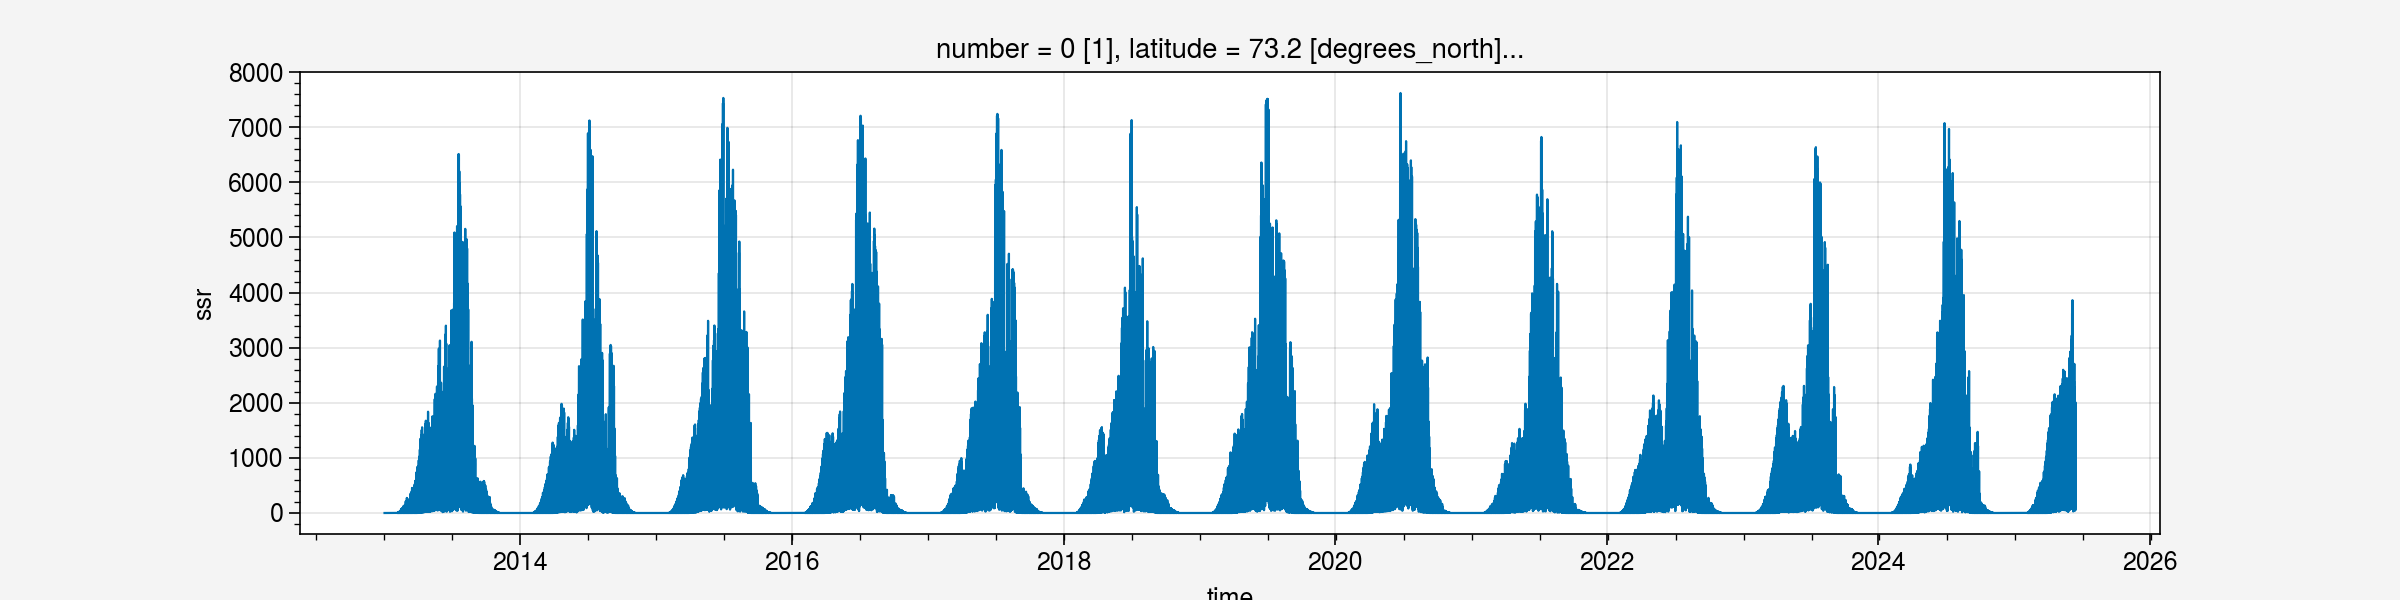

In [15]:
%matplotlib inline
(ds_ssr.ssr[:, 0, 0]/3600).plot(figsize=(12,3), lw=0.8)

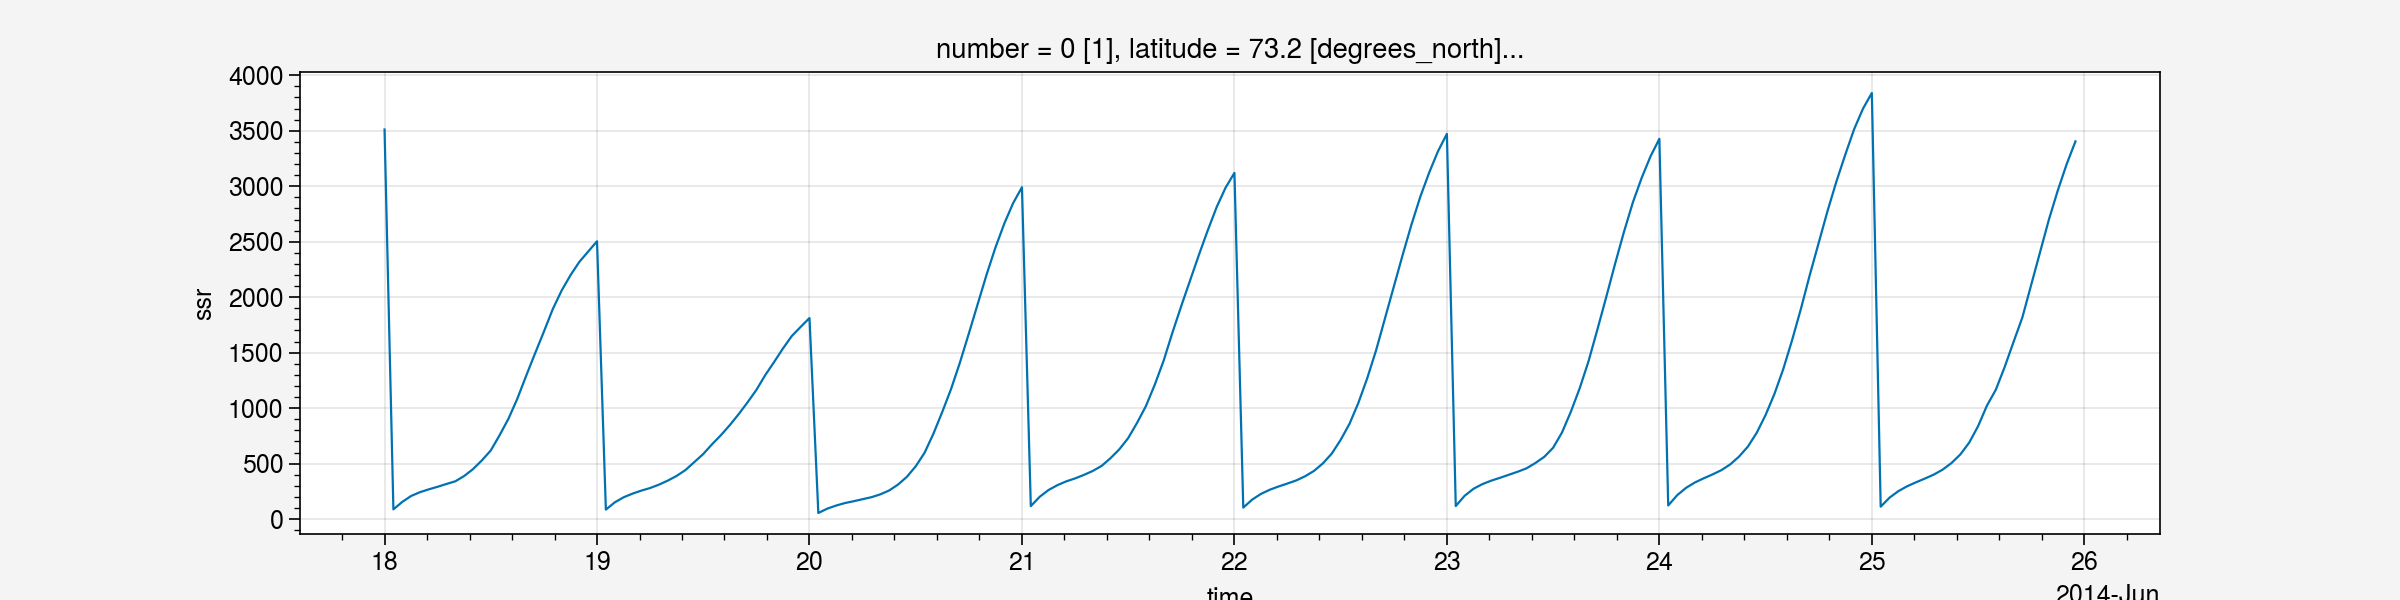

In [16]:
%matplotlib inline
(ds_ssr.ssr[:, 0, 0].sel(valid_time=slice('2014-06-18','2014-06-25'))/3600).plot(figsize=(12,3), lw=0.8)

<div style="background-color: #ffff99; color: black; padding: 10px; border-left: 5px solid orange;">
  ⚠️ <strong>Attention :</strong> ERA5-Land radiative values are accumulated.
</div>

### Convert accumulate to instantanous

In [19]:
time = ds_ssr['valid_time']
ds_ssr_diff = ds_ssr.diff('valid_time')
ds_ssr_diff_real = ds_ssr_diff.copy()
ds_ssr_diff_real = ds_ssr_diff_real.where(time.dt.hour[1:] != 1, other=ds_ssr.isel(valid_time=slice(1, None)))
ds_ssr_diff_real

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 109129, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 873kB 2013-01-01T01:00:00 ... 202...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    ssr         (valid_time, latitude, longitude) float32 2MB 0.0 ... 2.77e+05
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-18T17:27 GRIB to CDM+CF via cfgrib-0.9.1...

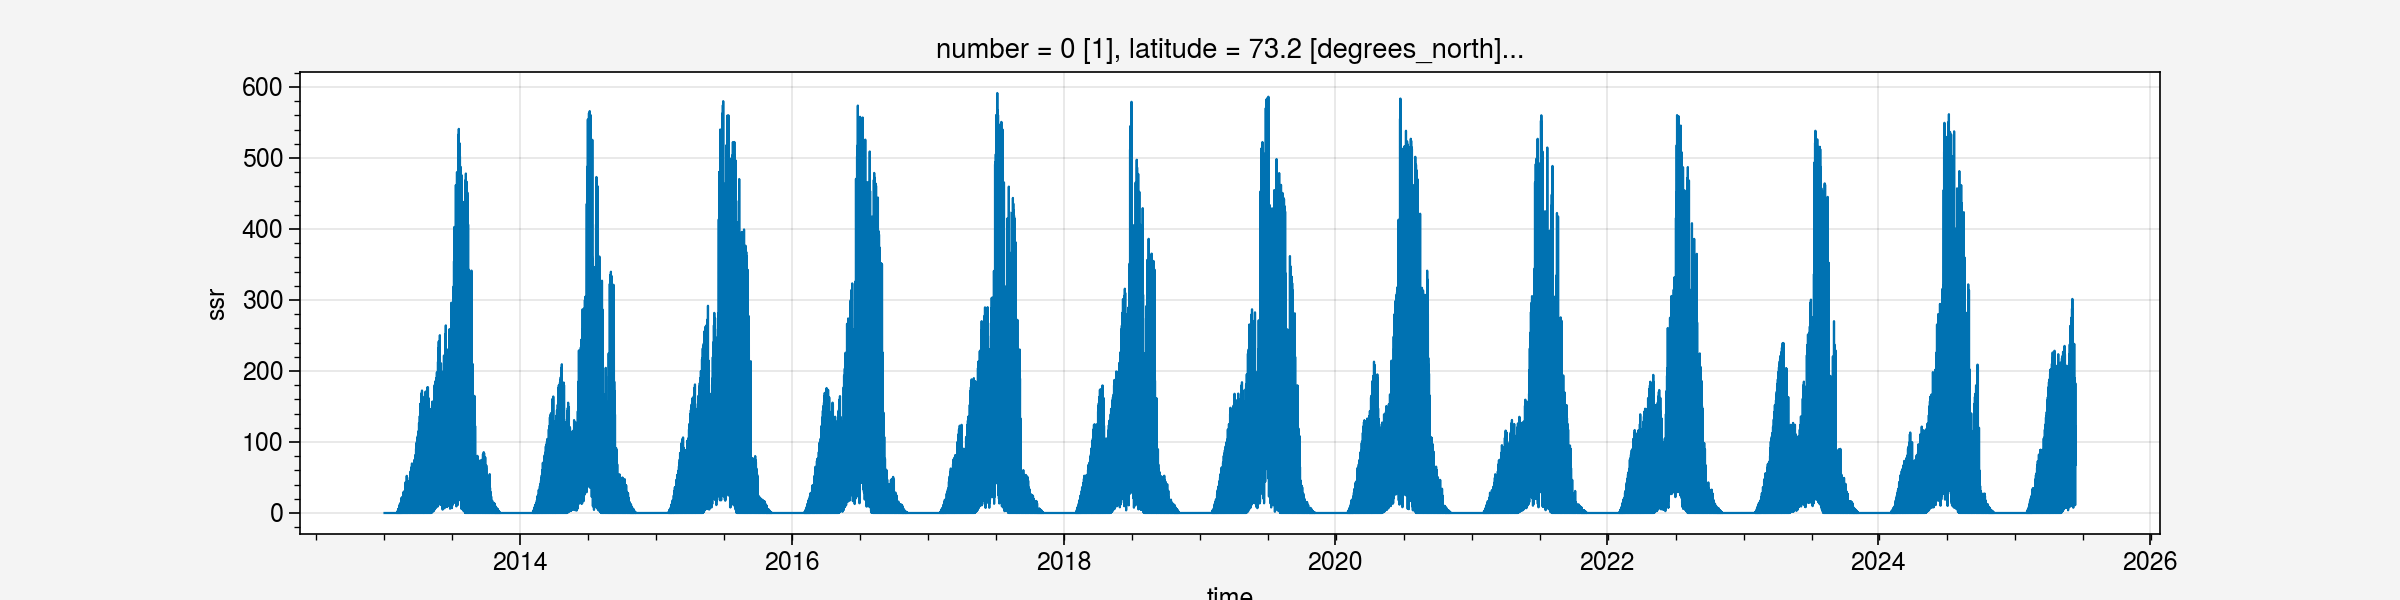

In [20]:
%matplotlib inline
(ds_ssr_diff_real.ssr[:, 0, 0]/3600).plot(figsize=(12,3), lw=0.8)

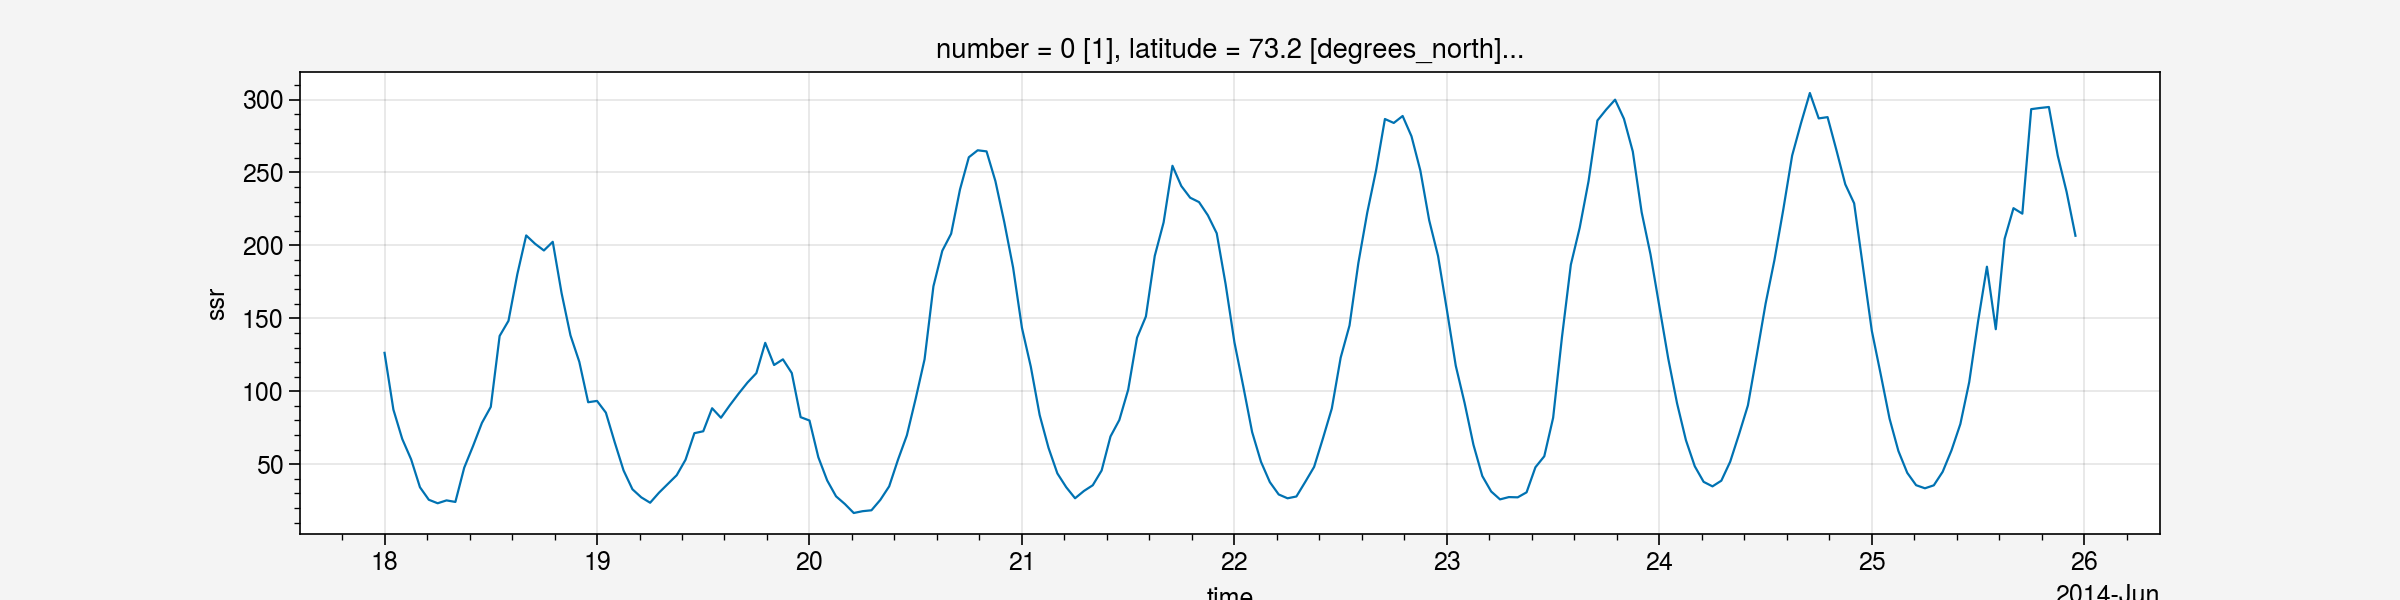

In [24]:
%matplotlib inline
(ds_ssr_diff_real.ssr[:, 0, 0].sel(valid_time=slice('2014-06-18','2014-06-25'))/3600).plot(figsize=(12,3), lw=0.8)

## Surface short-wave (solar) radiation down

In [25]:
ds_ssrd = xr.open_mfdataset(path_land+'/SW_down/ERA5_Land_SW_down_*_Bylot.nc')
ds_ssrd.load()

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 109252, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01 ... 2025-06-19T0...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    ssrd        (valid_time, latitude, longitude) float32 2MB 0.0 ... 1.769e+06
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-23T20:50 GRIB to CDM+CF via cfgrib-0.9.1...

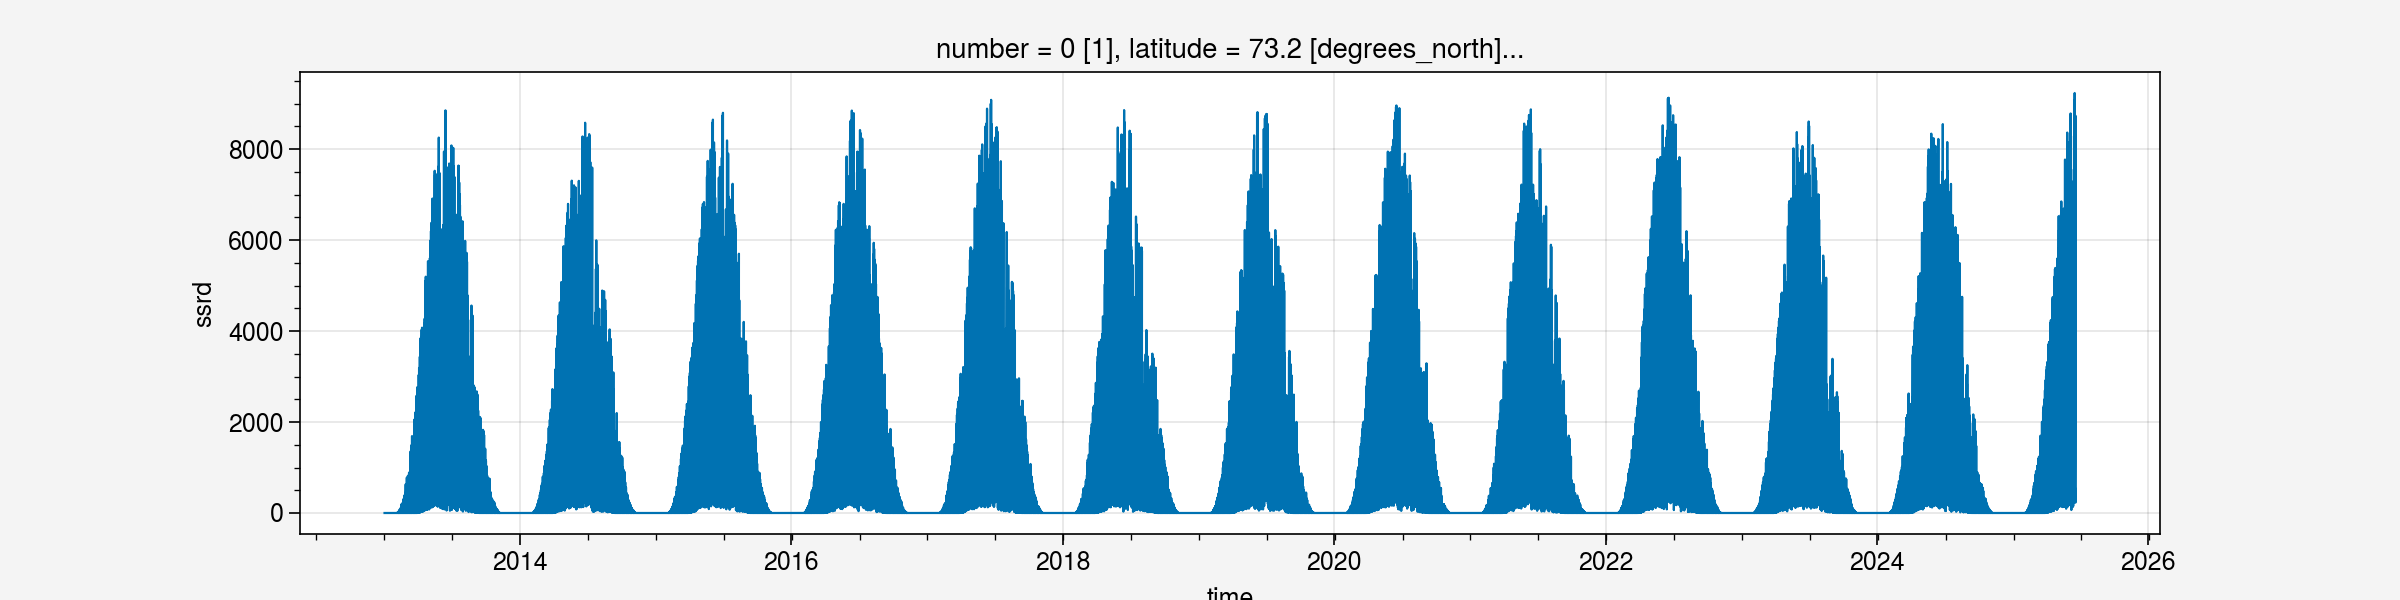

In [26]:
%matplotlib inline
(ds_ssrd.ssrd[:, 0, 0]/3600).plot(figsize=(12,3), lw=0.8)

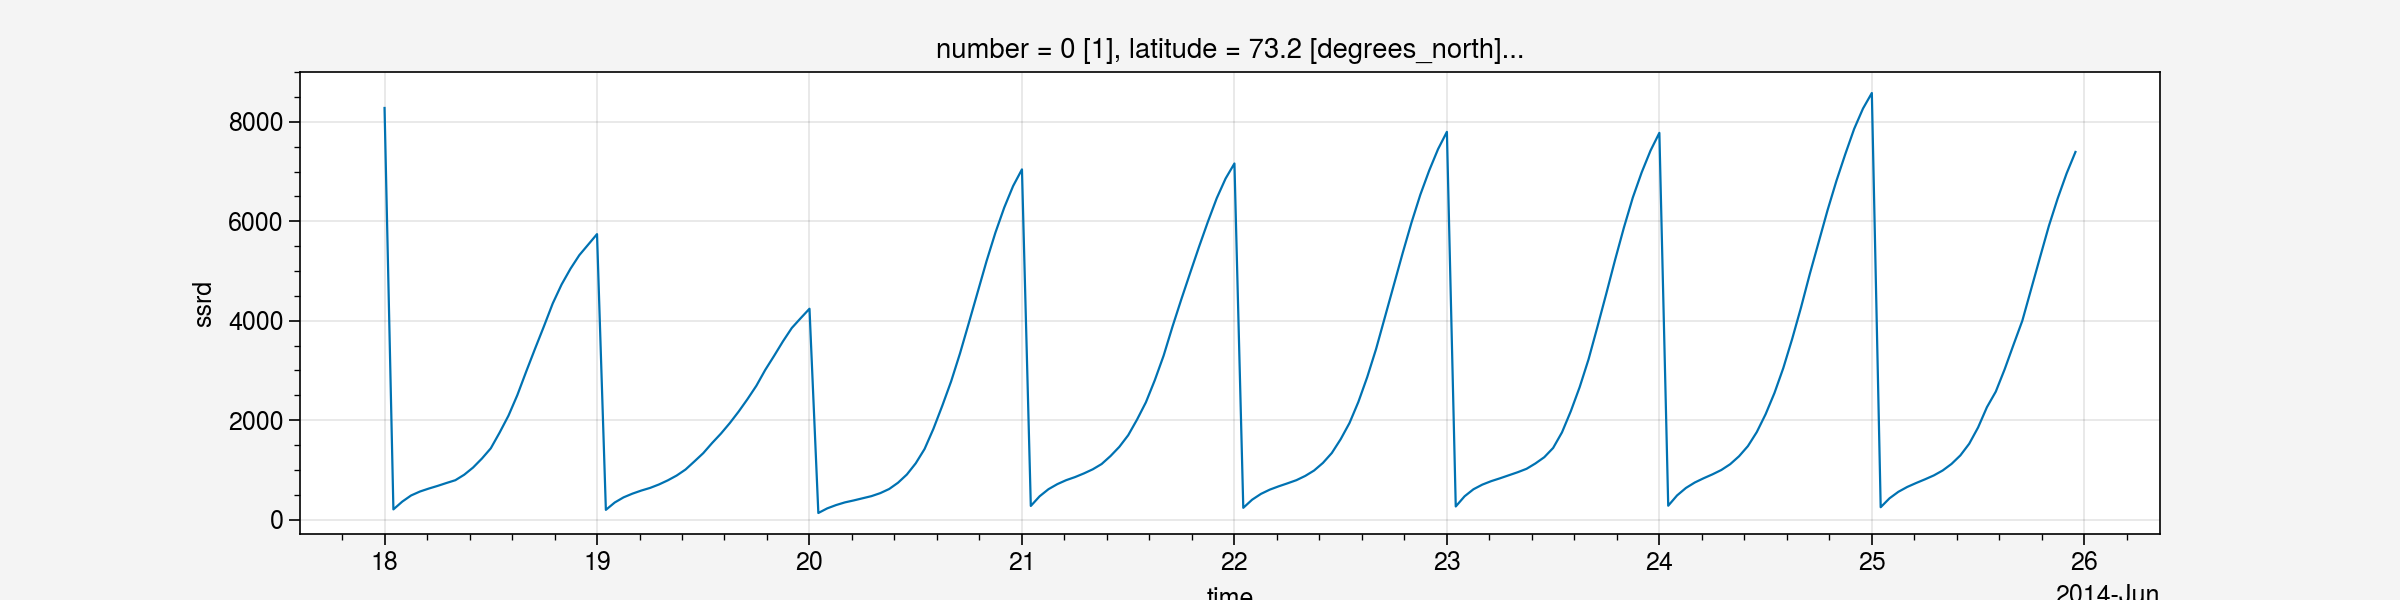

In [27]:
%matplotlib inline
(ds_ssrd.ssrd[:, 0, 0].sel(valid_time=slice('2014-06-18','2014-06-25'))/3600).plot(figsize=(12,3), lw=0.8)

<div style="background-color: #ffff99; color: black; padding: 10px; border-left: 5px solid orange;">
  ⚠️ <strong>Attention :</strong> ERA5-Land radiative values are accumulated.
</div>

### Convert accumulate to instantanous

In [28]:
time = ds_ssrd['valid_time']
ds_ssrd_diff = ds_ssrd.diff('valid_time')
ds_ssrd_diff_real = ds_ssrd_diff.copy()
ds_ssrd_diff_real = ds_ssrd_diff_real.where(time.dt.hour[1:] != 1, other=ds_ssrd.isel(valid_time=slice(1, None)))
ds_ssrd_diff_real

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 109251, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01T01:00:00 ... 202...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    ssrd        (valid_time, latitude, longitude) float32 2MB 0.0 ... 4.335e+05
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-23T20:50 GRIB to CDM+CF via cfgrib-0.9.1...

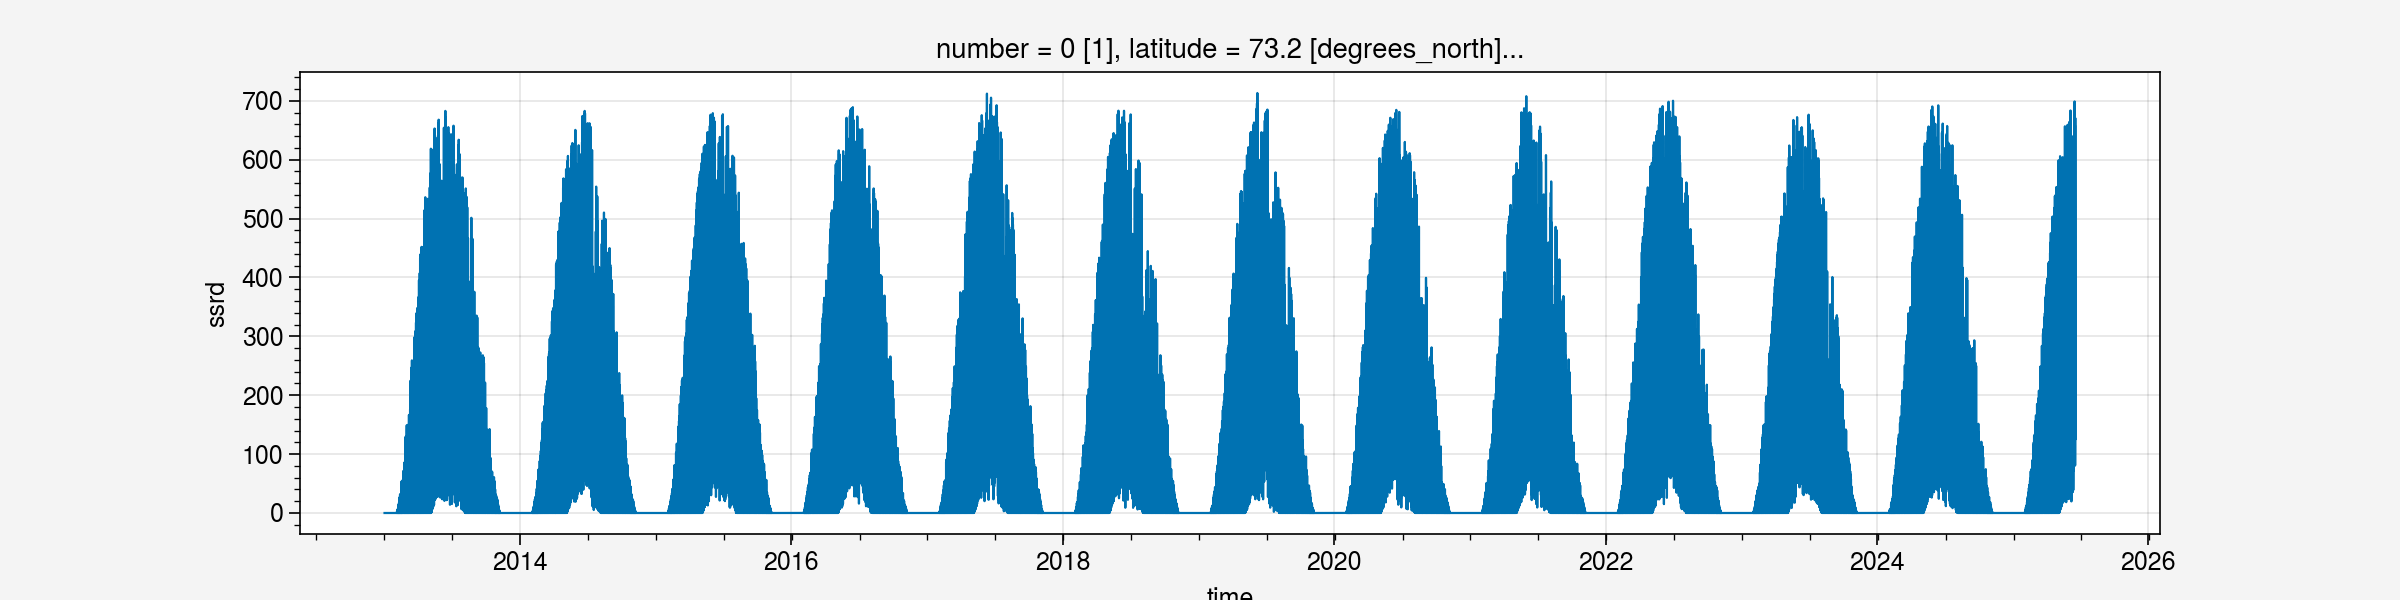

In [29]:
%matplotlib inline
(ds_ssrd_diff_real.ssrd[:, 0, 0]/3600).plot(figsize=(12,3), lw=0.8)

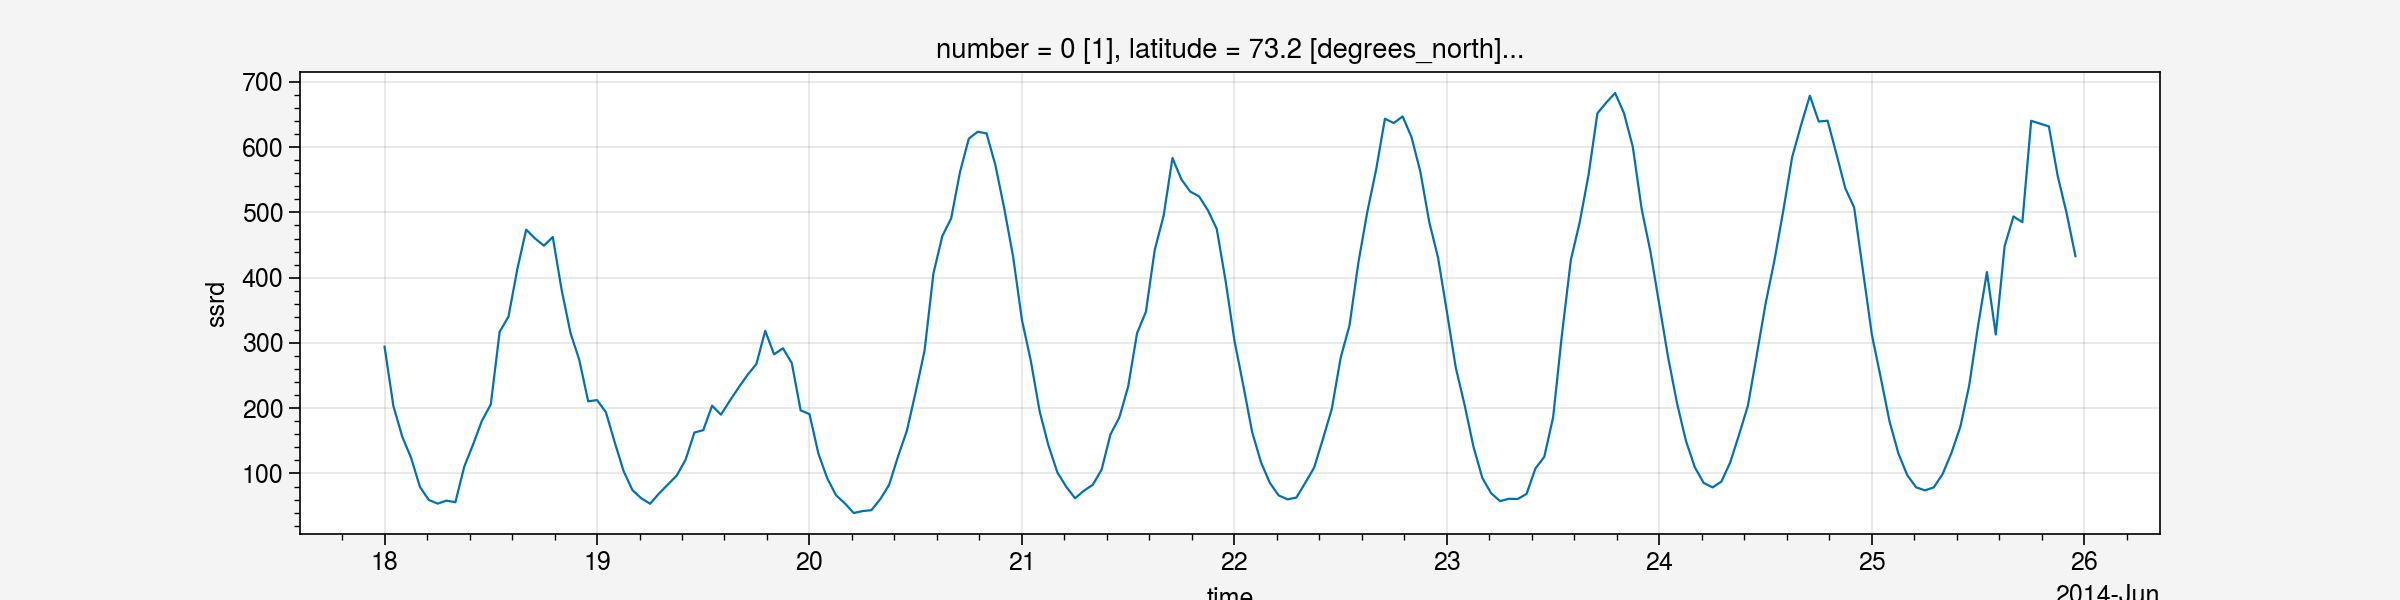

In [30]:
%matplotlib inline
(ds_ssrd_diff_real.ssrd[:, 0, 0].sel(valid_time=slice('2014-06-18','2014-06-25'))/3600).plot(figsize=(12,3), lw=0.8)

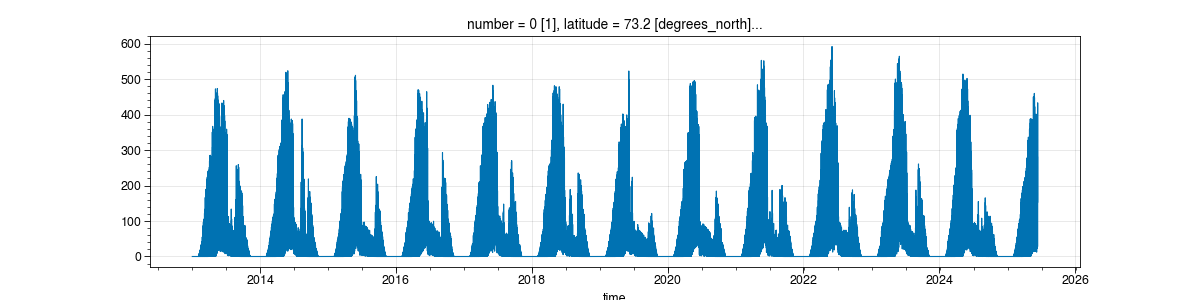

In [32]:
%matplotlib widget
((ds_ssrd_diff_real.ssrd[:, 0, 0] - ds_ssr_diff_real.ssr[:, 0, 0])/3600).plot(figsize=(12,3), lw=0.8)

### Gather all variable in one dataset

In [33]:
ds_all = ds_ssrd_diff_real/3600 # convert to W/m2
ds_all

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 109251, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01T01:00:00 ... 202...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    ssrd        (valid_time, latitude, longitude) float32 2MB 0.0 0.0 ... 120.4
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-23T20:50 GRIB to CDM+CF via cfgrib-0.9.1...

In [34]:
ds_all['ssr'] = ds_ssr_diff_real.ssr/3600 # convert to W/m2
ds_all['ssru'] = (ds_ssrd_diff_real.ssrd - ds_ssr_diff_real.ssr)/3600 # convert to W/m2
ds_all

<xarray.Dataset> Size: 8MB
Dimensions:     (valid_time: 109251, latitude: 2, longitude: 2)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01T01:00:00 ... 202...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    number      int64 8B 0
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    ssrd        (valid_time, latitude, longitude) float32 2MB 0.0 0.0 ... 120.4
    ssr         (valid_time, latitude, longitude) float32 2MB 0.0 0.0 ... nan
    ssru        (valid_time, latitude, longitude) float32 2MB 0.0 0.0 ... nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-23T20:50 GRIB to CDM+CF via cfgrib-0.9.1...

## Surface long-wave net (thermal) radiation net

In [35]:
ds_str = xr.open_mfdataset(path_land+'/LW_net/ERA5_Land_LW_net_*_Bylot.nc')
ds_str.load()

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 109245, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01 ... 2025-06-18T2...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    str         (valid_time, latitude, longitude) float32 2MB -2.191e+06 ... ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-19T13:03 GRIB to CDM+CF via cfgrib-0.9.1...

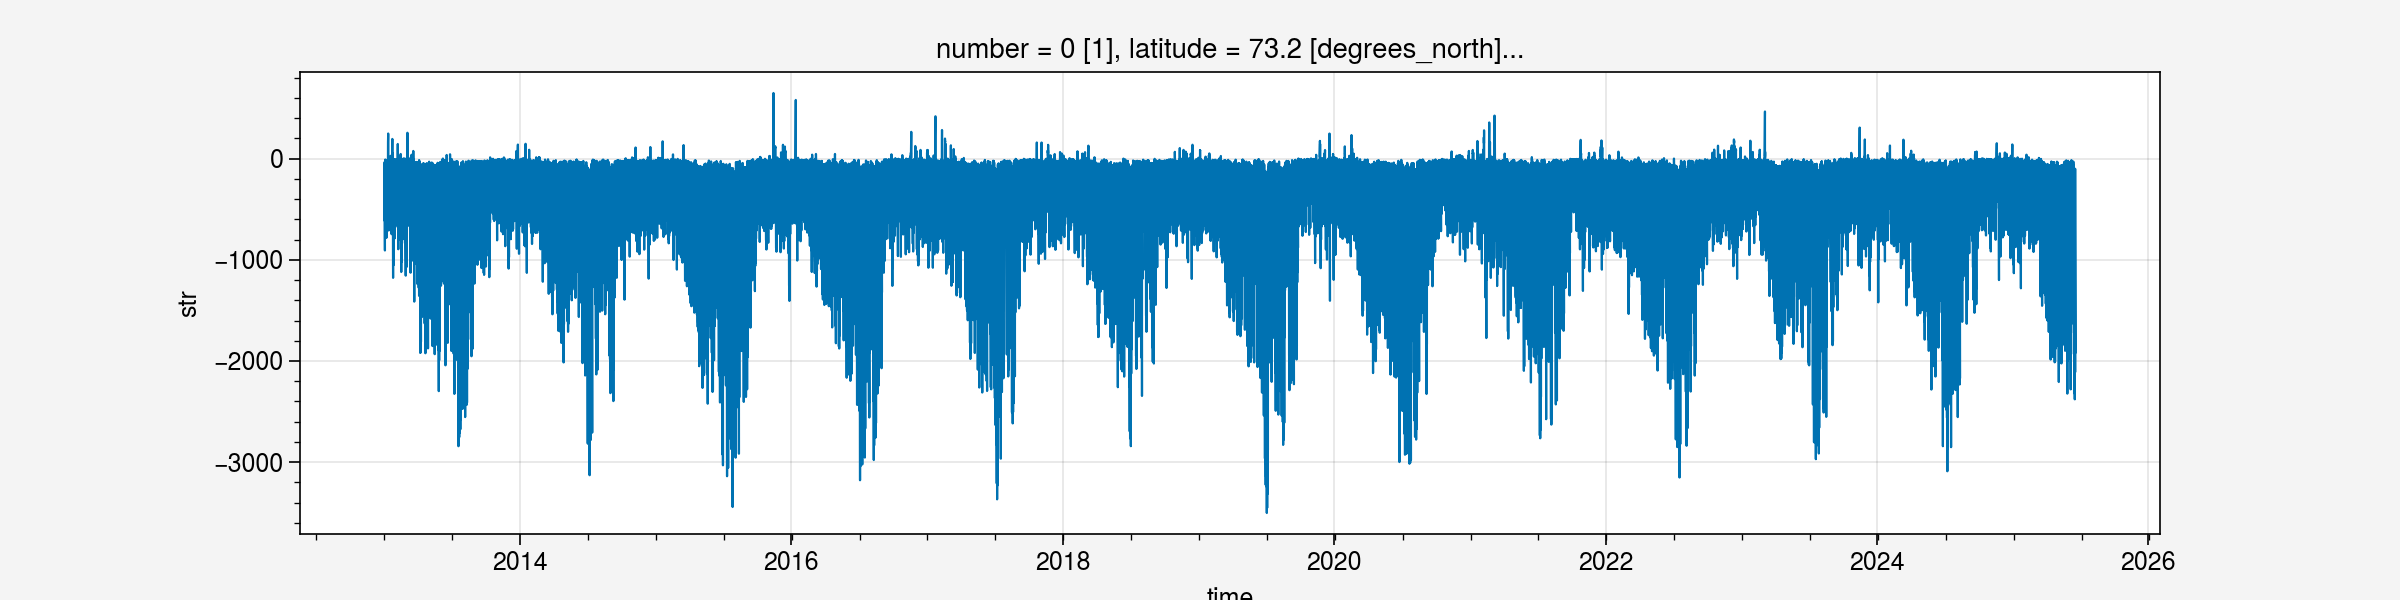

In [37]:
%matplotlib inline
(ds_str.str[:, 0, 0]/3600).plot(figsize=(12,3), lw=0.8)

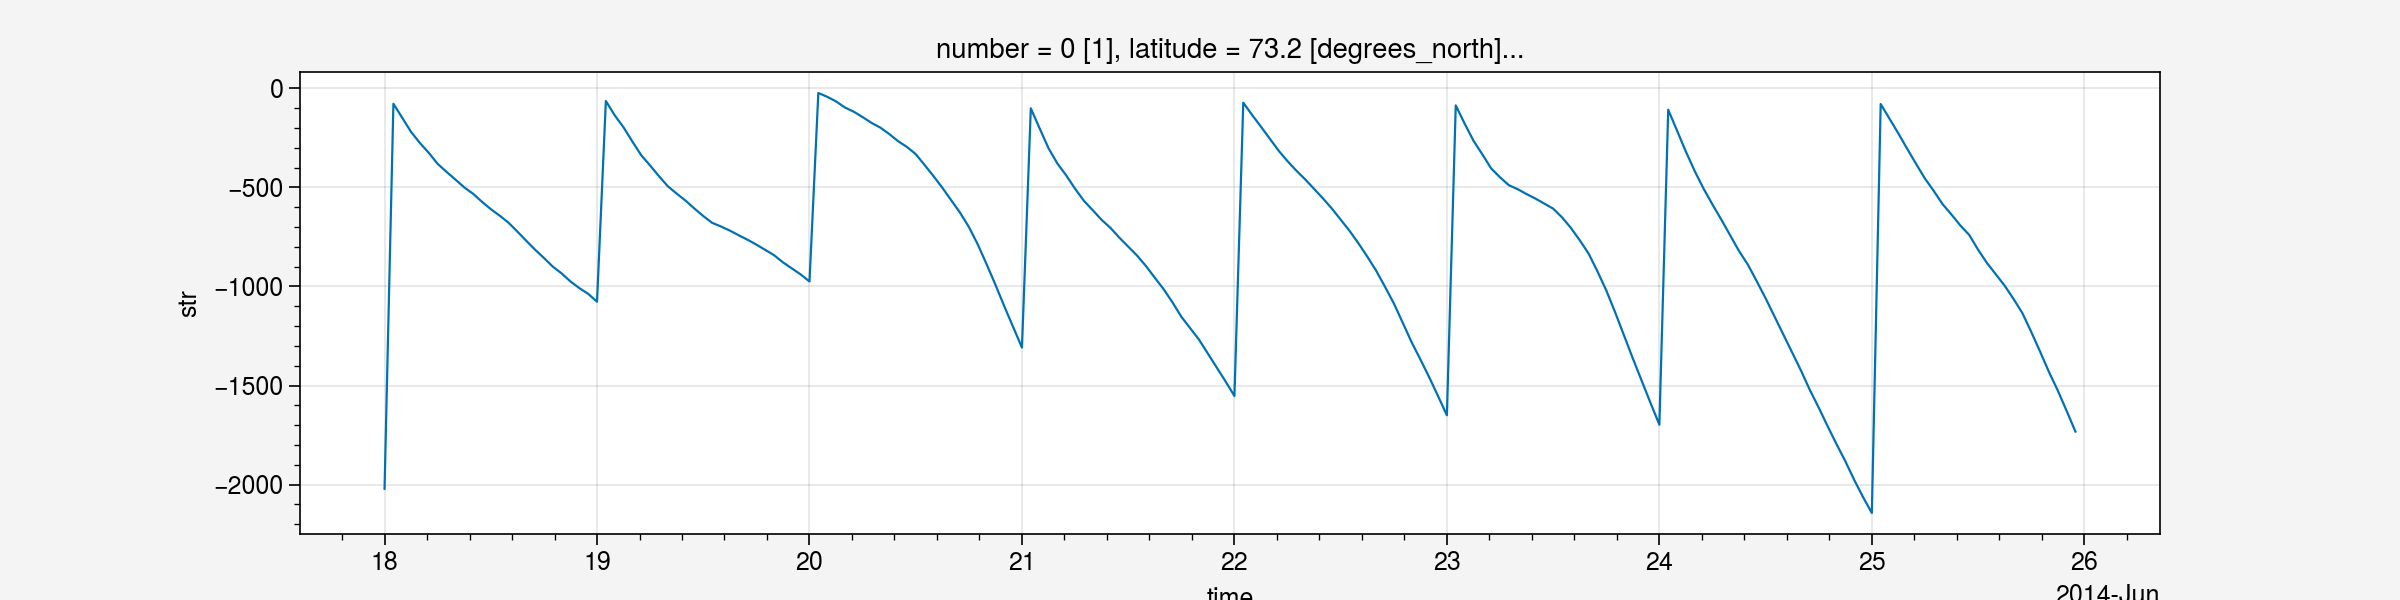

In [38]:
%matplotlib inline
(ds_str.str[:, 0, 0].sel(valid_time=slice('2014-06-18','2014-06-25'))/3600).plot(figsize=(12,3), lw=0.8)

<div style="background-color: #ffff99; color: black; padding: 10px; border-left: 5px solid orange;">
  ⚠️ <strong>Attention :</strong> ERA5-Land radiative values are accumulated.
</div>

### Convert accumulate to instantanous

In [39]:
time = ds_str['valid_time']
ds_str_diff = ds_str.diff('valid_time')
ds_str_diff_real = ds_str_diff.copy()
ds_str_diff_real = ds_str_diff_real.where(time.dt.hour[1:] != 1, other=ds_str.isel(valid_time=slice(1, None)))
ds_str_diff_real

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 109244, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01T01:00:00 ... 202...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    str         (valid_time, latitude, longitude) float32 2MB -1.499e+05 ... ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-19T13:03 GRIB to CDM+CF via cfgrib-0.9.1...

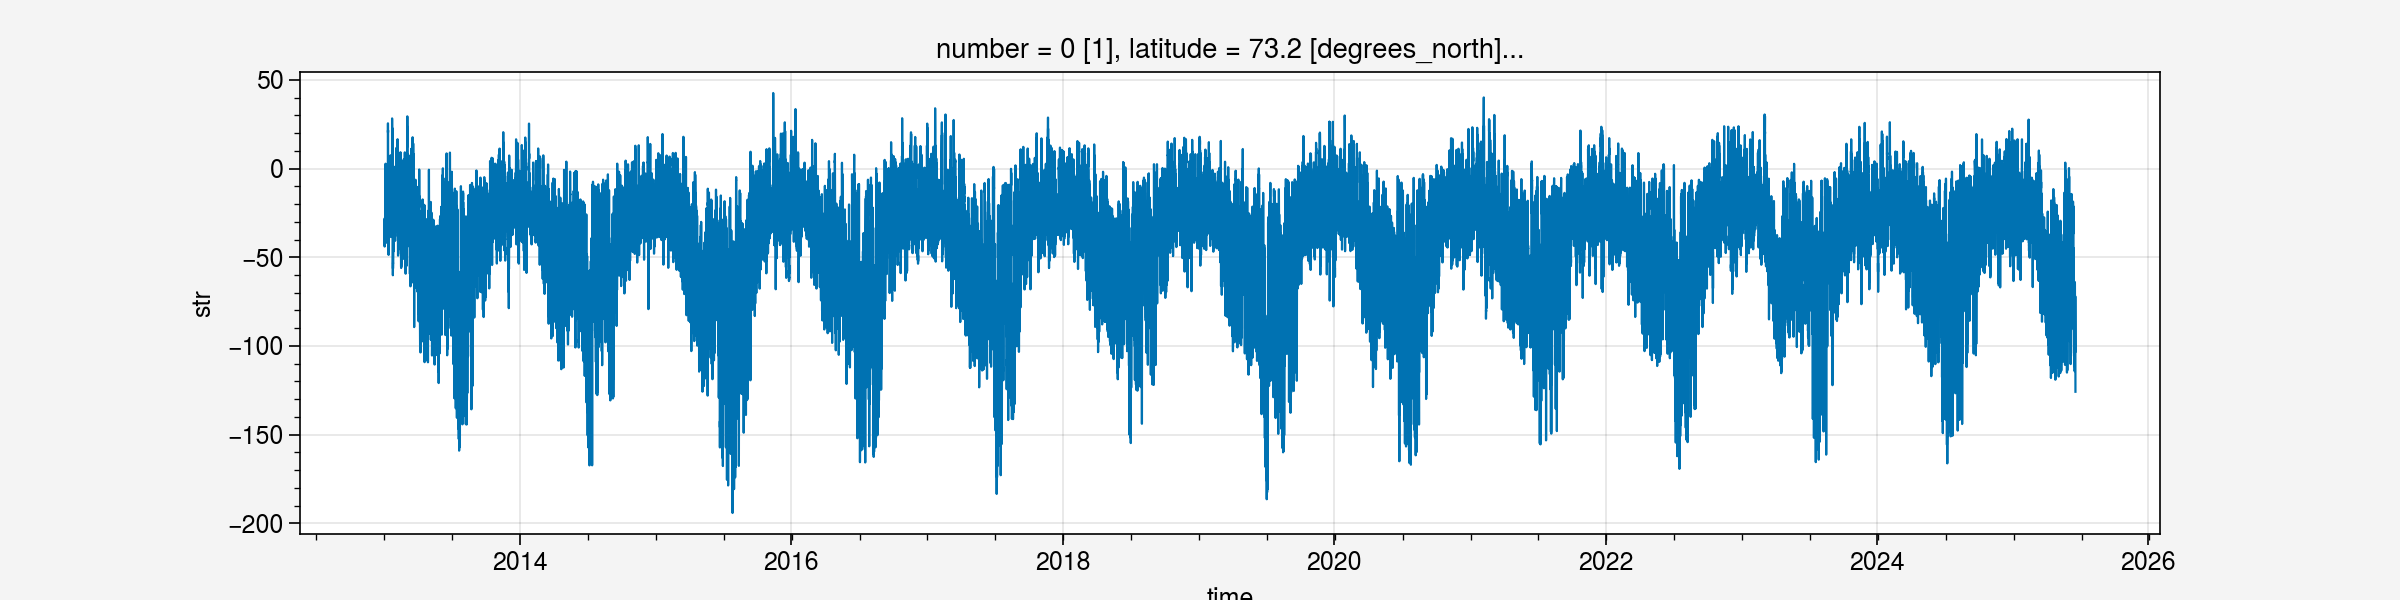

In [40]:
%matplotlib inline
(ds_str_diff_real.str[:, 0, 0]/3600).plot(figsize=(12,3), lw=0.8)

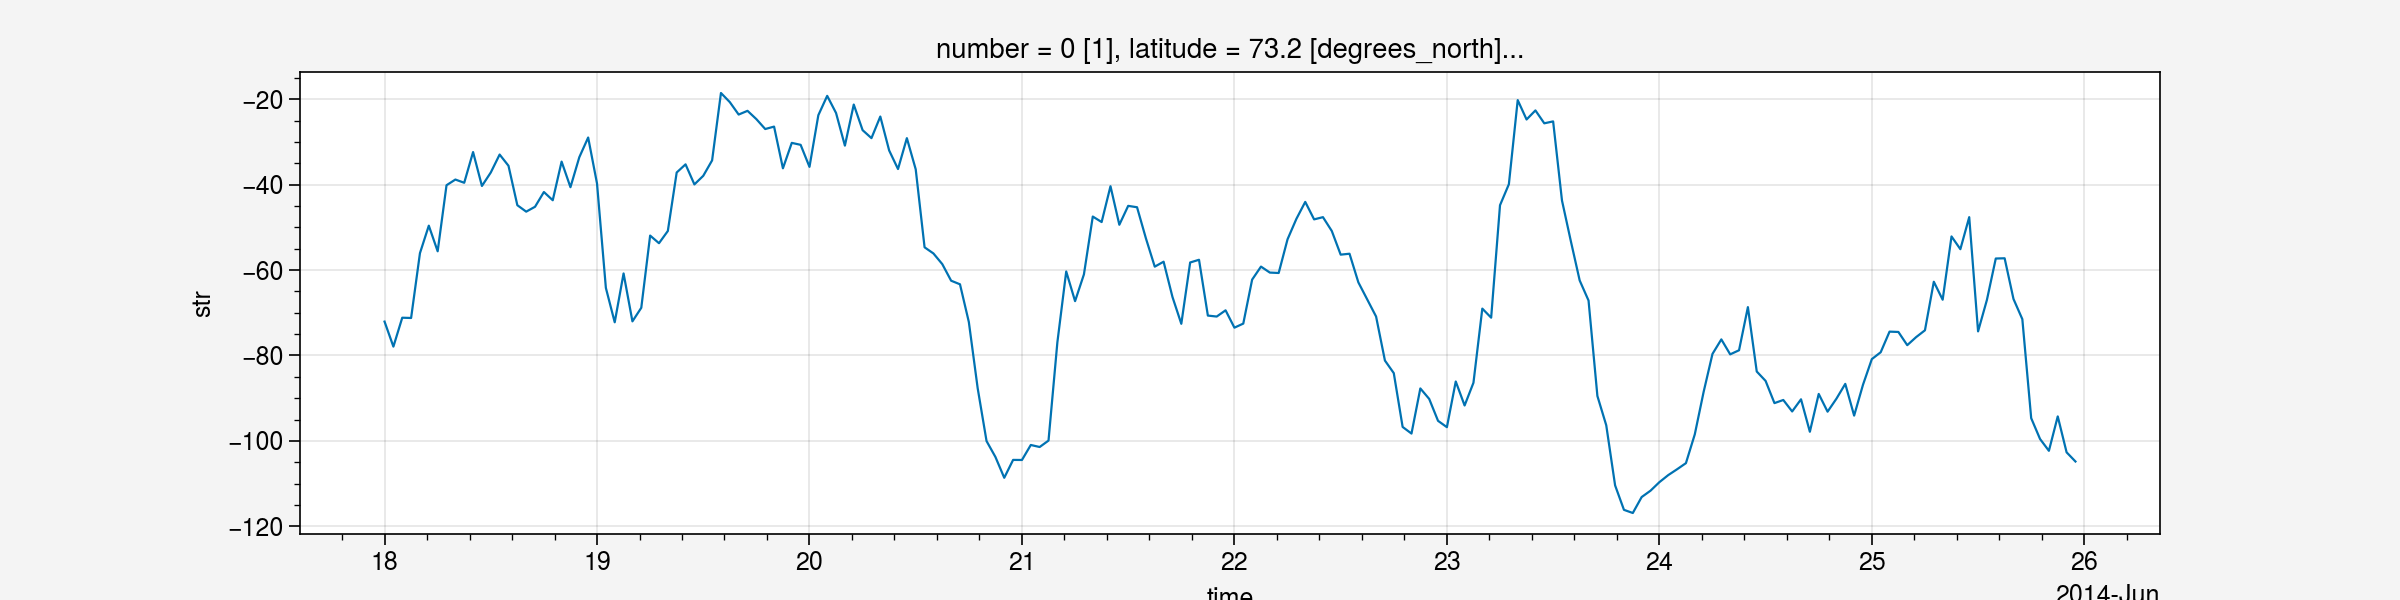

In [41]:
%matplotlib inline
(ds_str_diff_real.str[:, 0, 0].sel(valid_time=slice('2014-06-18','2014-06-25'))/3600).plot(figsize=(12,3), lw=0.8)

## Surface long-wave net (thermal) radiation down

In [42]:
ds_strd = xr.open_mfdataset(path_land+'/LW_down/ERA5_Land_LW_down_*_Bylot.nc')
ds_strd.load()

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 109260, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01 ... 2025-06-19T1...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    strd        (valid_time, latitude, longitude) float32 2MB 1.405e+07 ... 1...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-24T03:59 GRIB to CDM+CF via cfgrib-0.9.1...

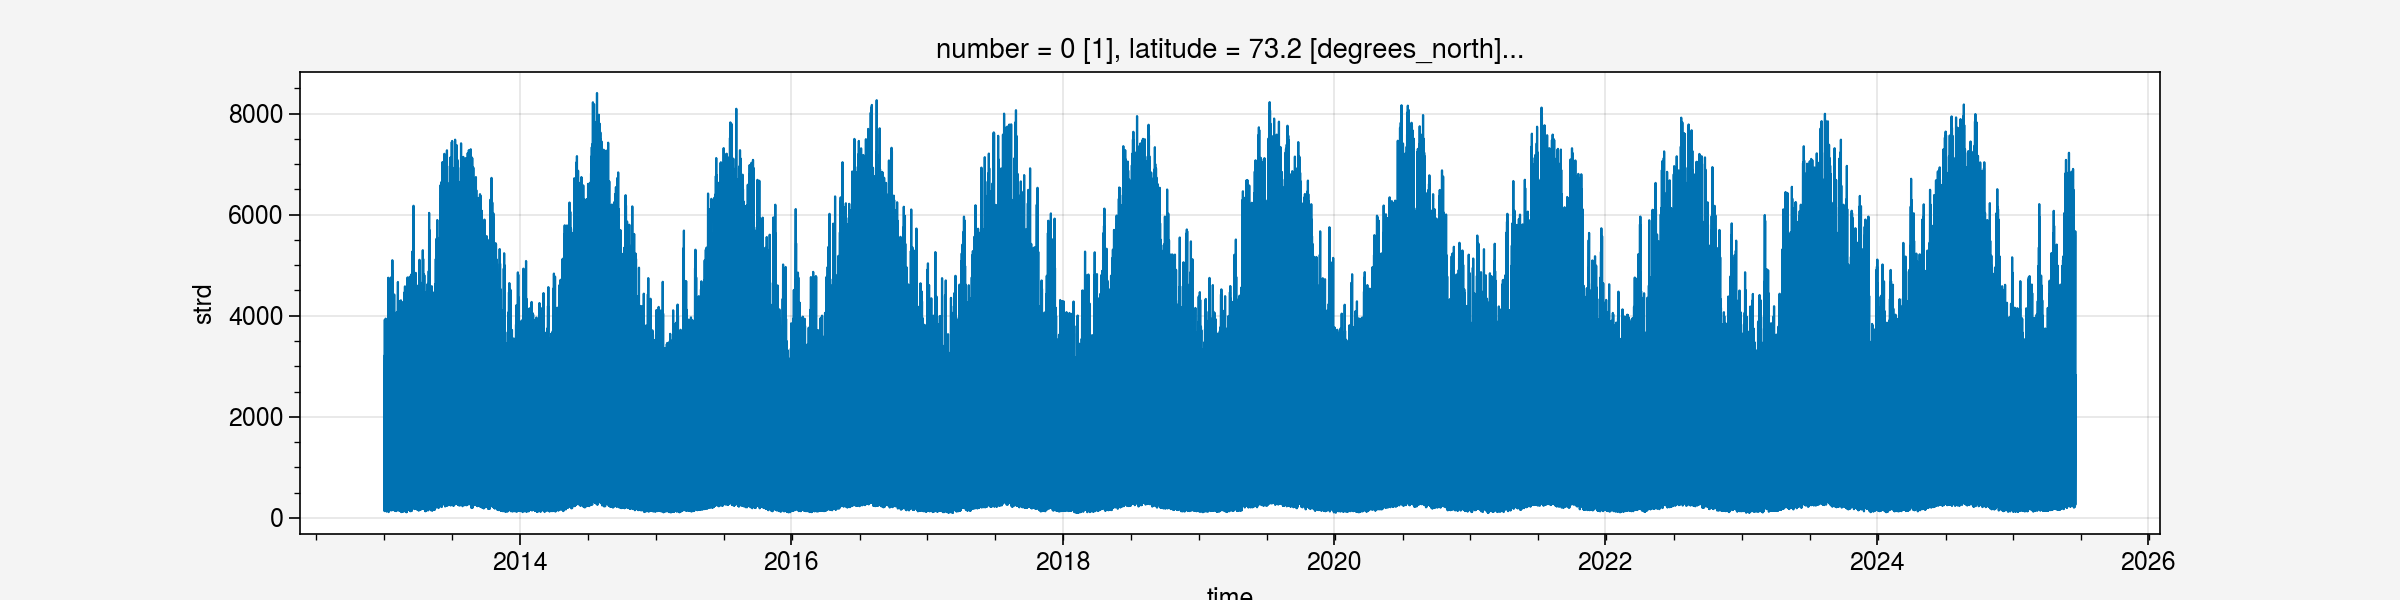

In [43]:
%matplotlib inline
(ds_strd.strd[:, 0, 0]/3600).plot(figsize=(12,3), lw=0.8)

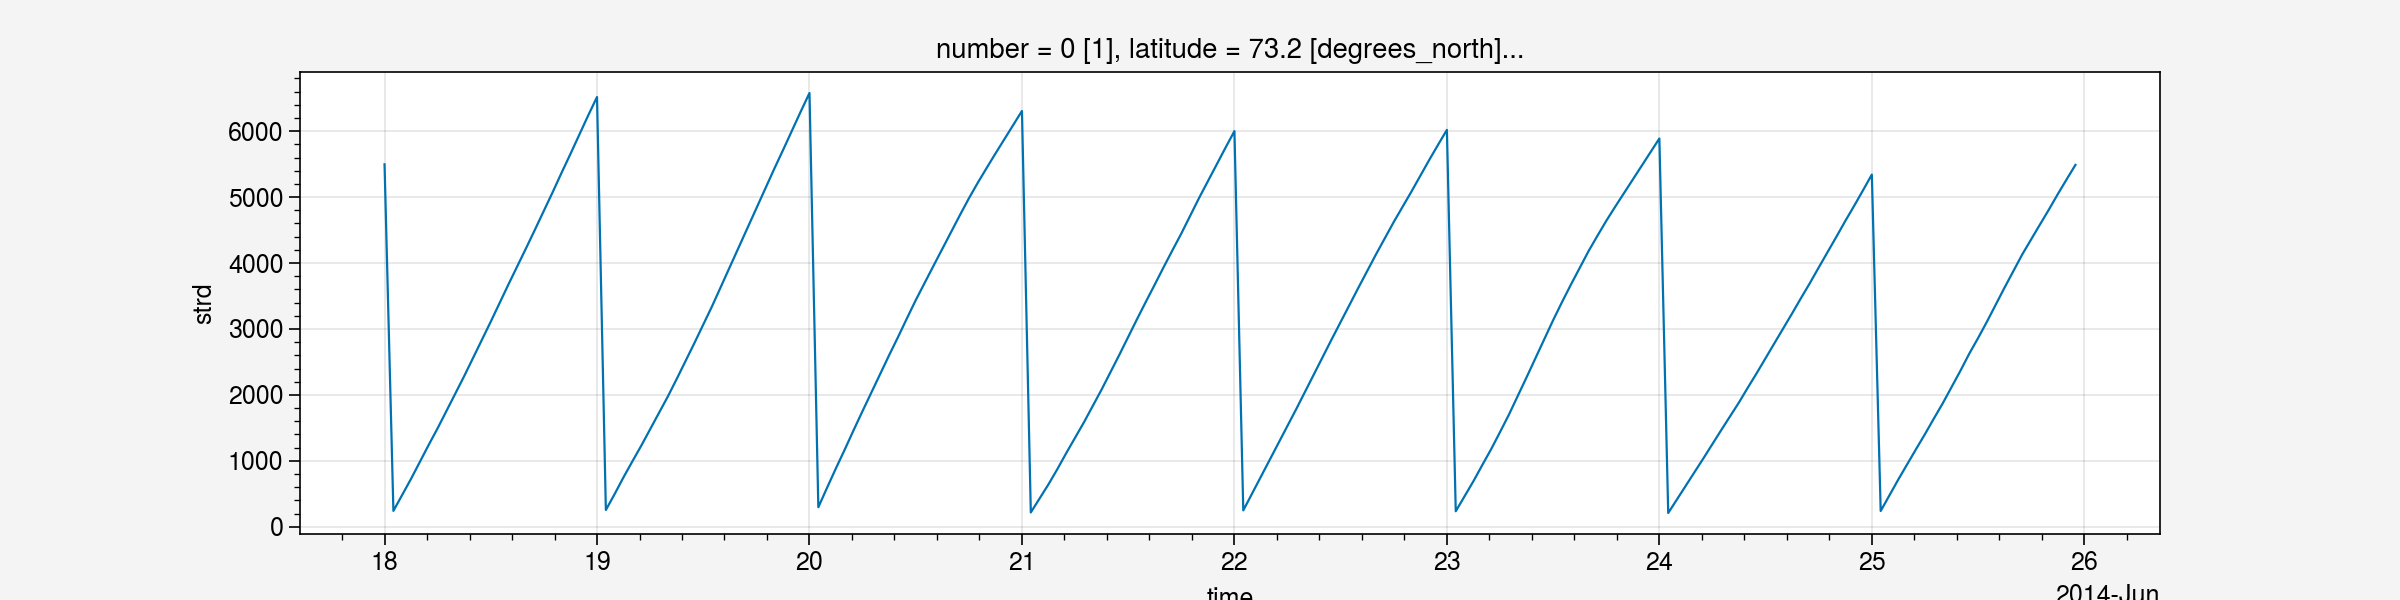

In [44]:
%matplotlib inline
(ds_strd.strd[:, 0, 0].sel(valid_time=slice('2014-06-18','2014-06-25'))/3600).plot(figsize=(12,3), lw=0.8)

<div style="background-color: #ffff99; color: black; padding: 10px; border-left: 5px solid orange;">
  ⚠️ <strong>Attention :</strong> ERA5-Land radiative values are accumulated.
</div>

### Convert accumulate to instantanous

In [46]:
time = ds_strd['valid_time']
ds_strd_diff = ds_strd.diff('valid_time')
ds_strd_diff_real = ds_strd_diff.copy()
ds_strd_diff_real = ds_strd_diff_real.where(time.dt.hour[1:] != 1, other=ds_strd.isel(valid_time=slice(1, None)))
ds_strd_diff_real

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 109259, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01T01:00:00 ... 202...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    strd        (valid_time, latitude, longitude) float32 2MB 4.866e+05 ... 9...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-24T03:59 GRIB to CDM+CF via cfgrib-0.9.1...

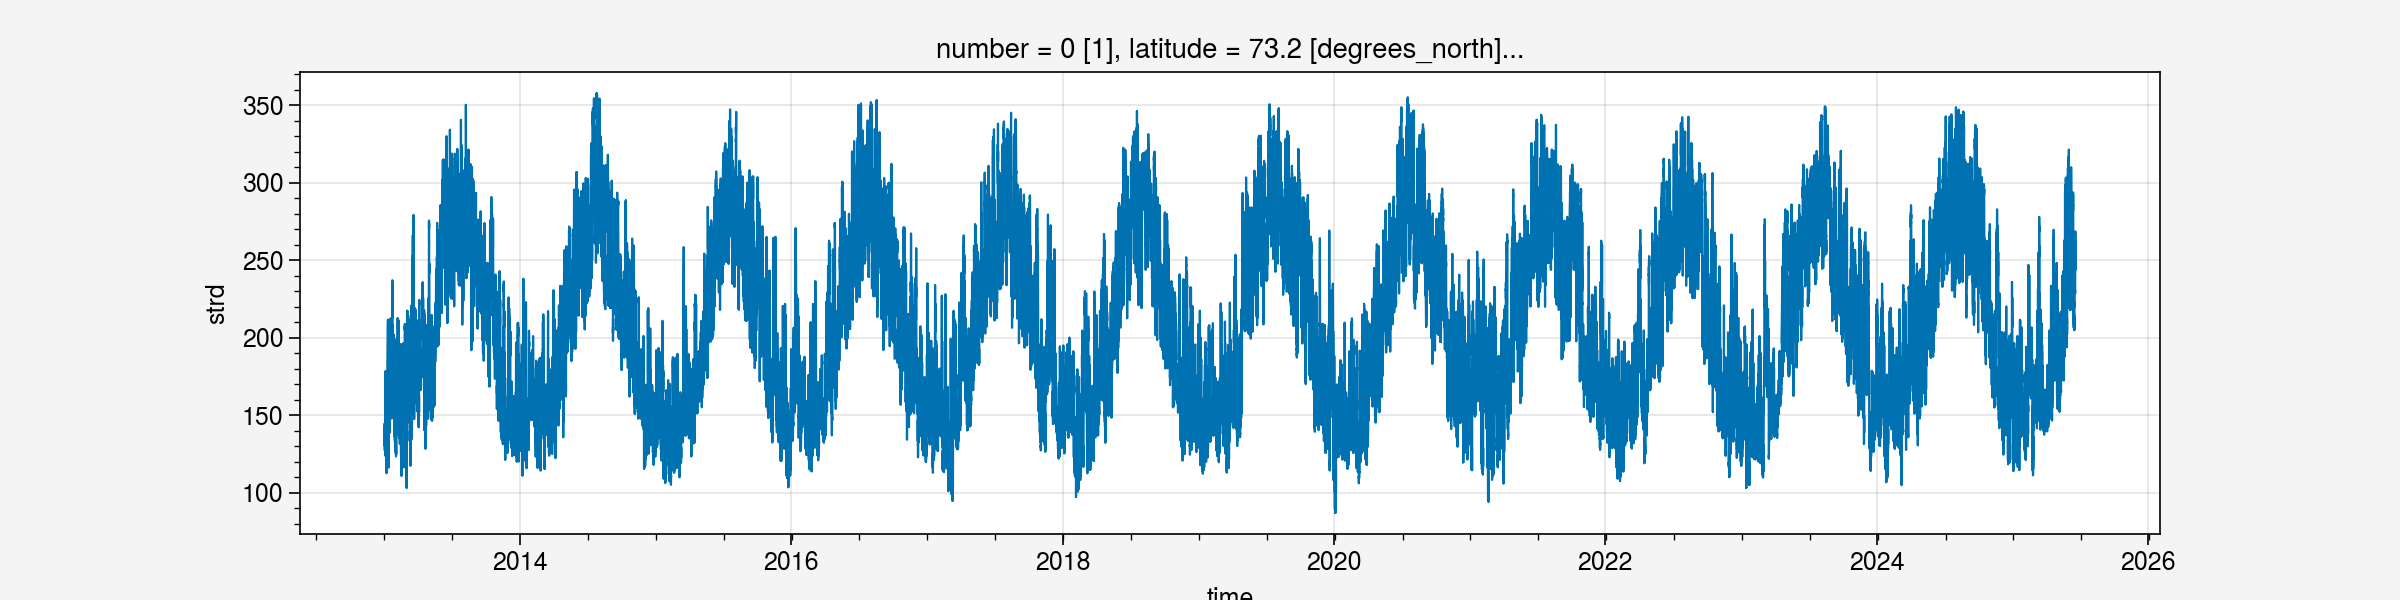

In [47]:
%matplotlib inline
(ds_strd_diff_real.strd[:, 0, 0]/3600).plot(figsize=(12,3), lw=0.8)

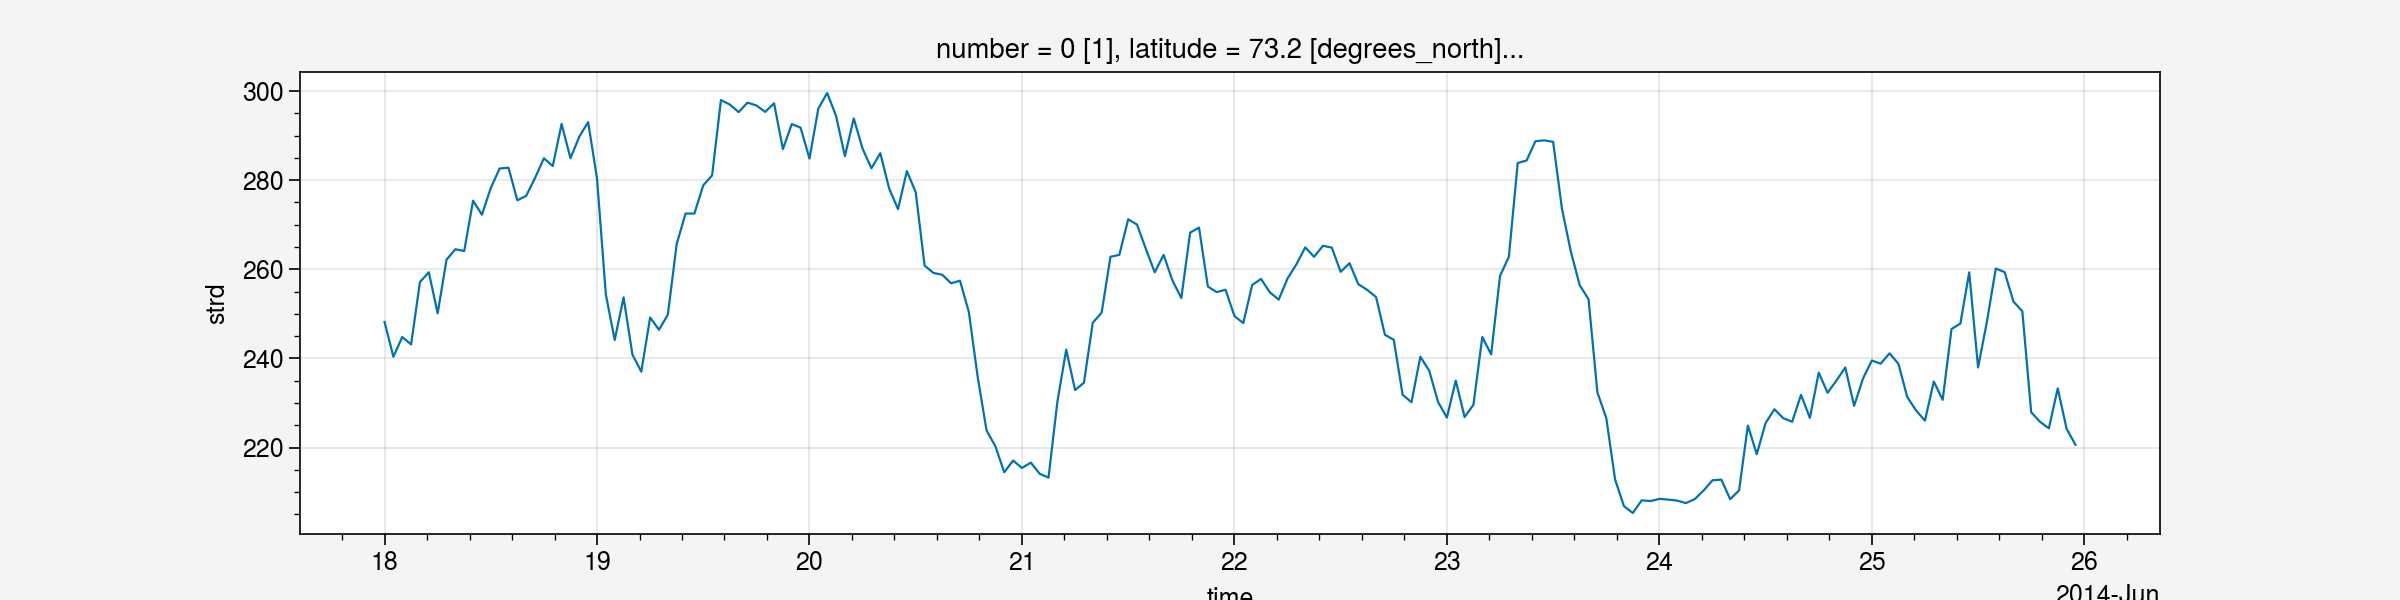

In [48]:
%matplotlib inline
(ds_strd_diff_real.strd[:, 0, 0].sel(valid_time=slice('2014-06-18','2014-06-25'))/3600).plot(figsize=(12,3), lw=0.8)

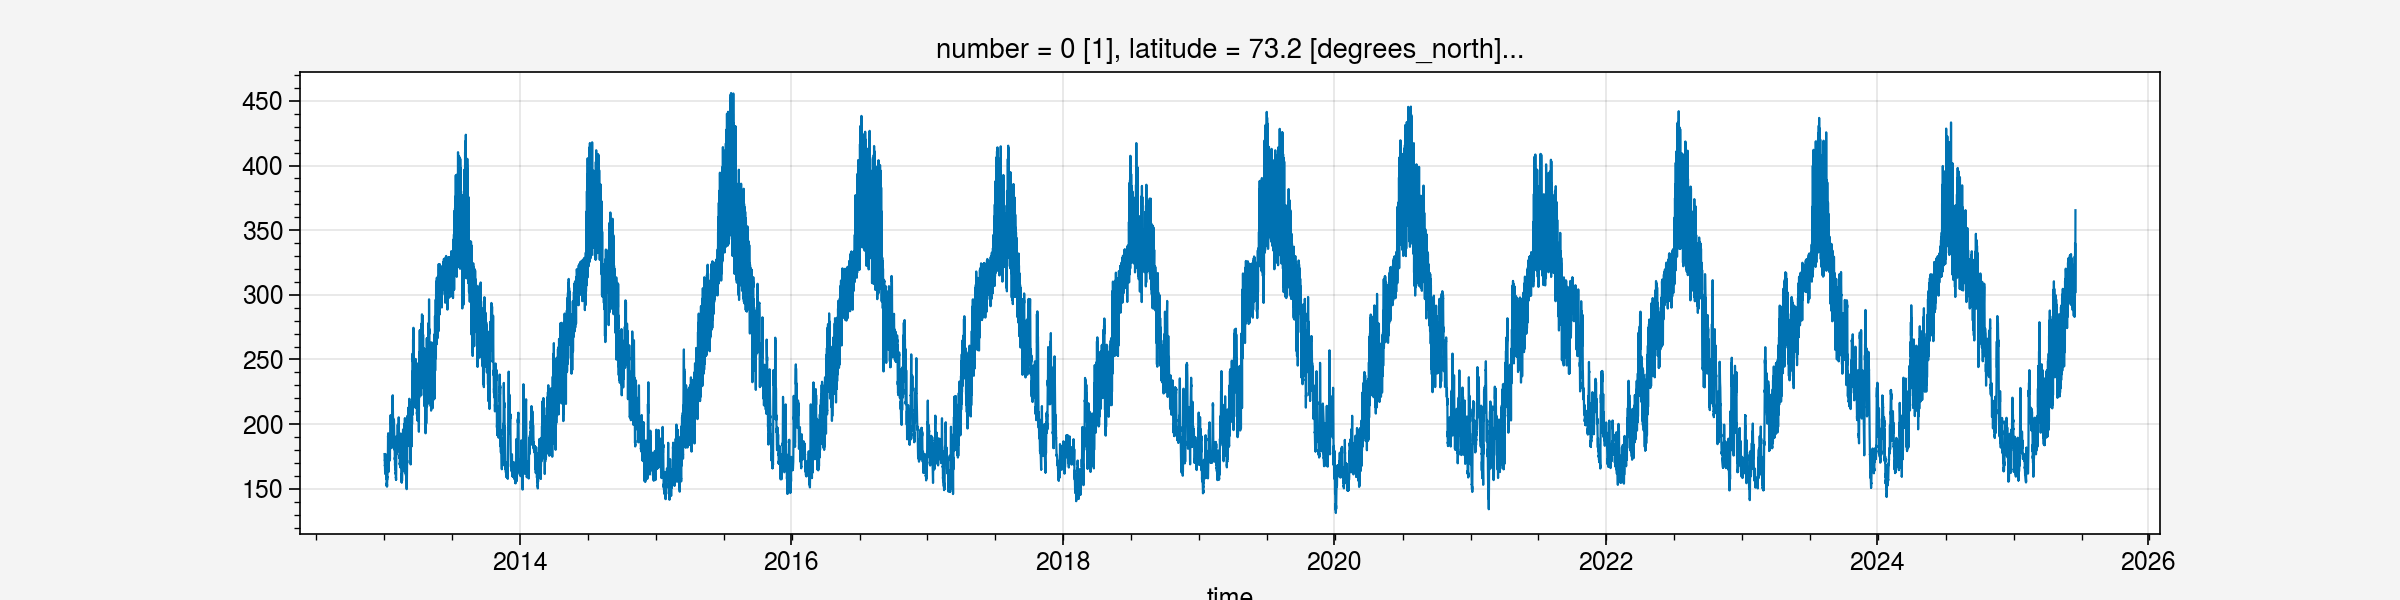

In [50]:
%matplotlib inline
((ds_strd_diff_real.strd[:, 0, 0] - ds_str_diff_real.str[:, 0, 0])/3600).plot(figsize=(12,3), lw=0.8)

### Gather all variable in one dataset

In [51]:
ds_all['strd'] = ds_strd_diff_real.strd/3600 # convert to W/m2
ds_all['str'] = ds_str_diff_real.str/3600 # convert to W/m2
ds_all['stru'] = (ds_strd_diff_real.strd - ds_str_diff_real.str)/3600 # convert to W/m2
ds_all

<xarray.Dataset> Size: 13MB
Dimensions:     (valid_time: 109251, latitude: 2, longitude: 2)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01T01:00:00 ... 202...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    number      int64 8B 0
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    ssrd        (valid_time, latitude, longitude) float32 2MB 0.0 0.0 ... 120.4
    ssr         (valid_time, latitude, longitude) float32 2MB 0.0 0.0 ... nan
    ssru        (valid_time, latitude, longitude) float32 2MB 0.0 0.0 ... nan
    strd        (valid_time, latitude, longitude) float32 2MB 135.2 ... 273.2
    str         (valid_time, latitude, longitude) float32 2MB -41.65 ... nan
    stru        (valid_time, latitude, longitude) float32 2MB 176.8 ... nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-23T20:50 GRIB to CDM+CF via cfgrib-0.9.1...

## Surface_pressure

In [57]:
ds_sp = xr.open_mfdataset(path_land+'/SP/ERA5_Land_SP_*_Bylot.nc')
ds_sp.load()

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 109291, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01 ... 2025-06-20T1...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    sp          (valid_time, latitude, longitude) float32 2MB 9.882e+04 ... 9...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-24T11:33 GRIB to CDM+CF via cfgrib-0.9.1...

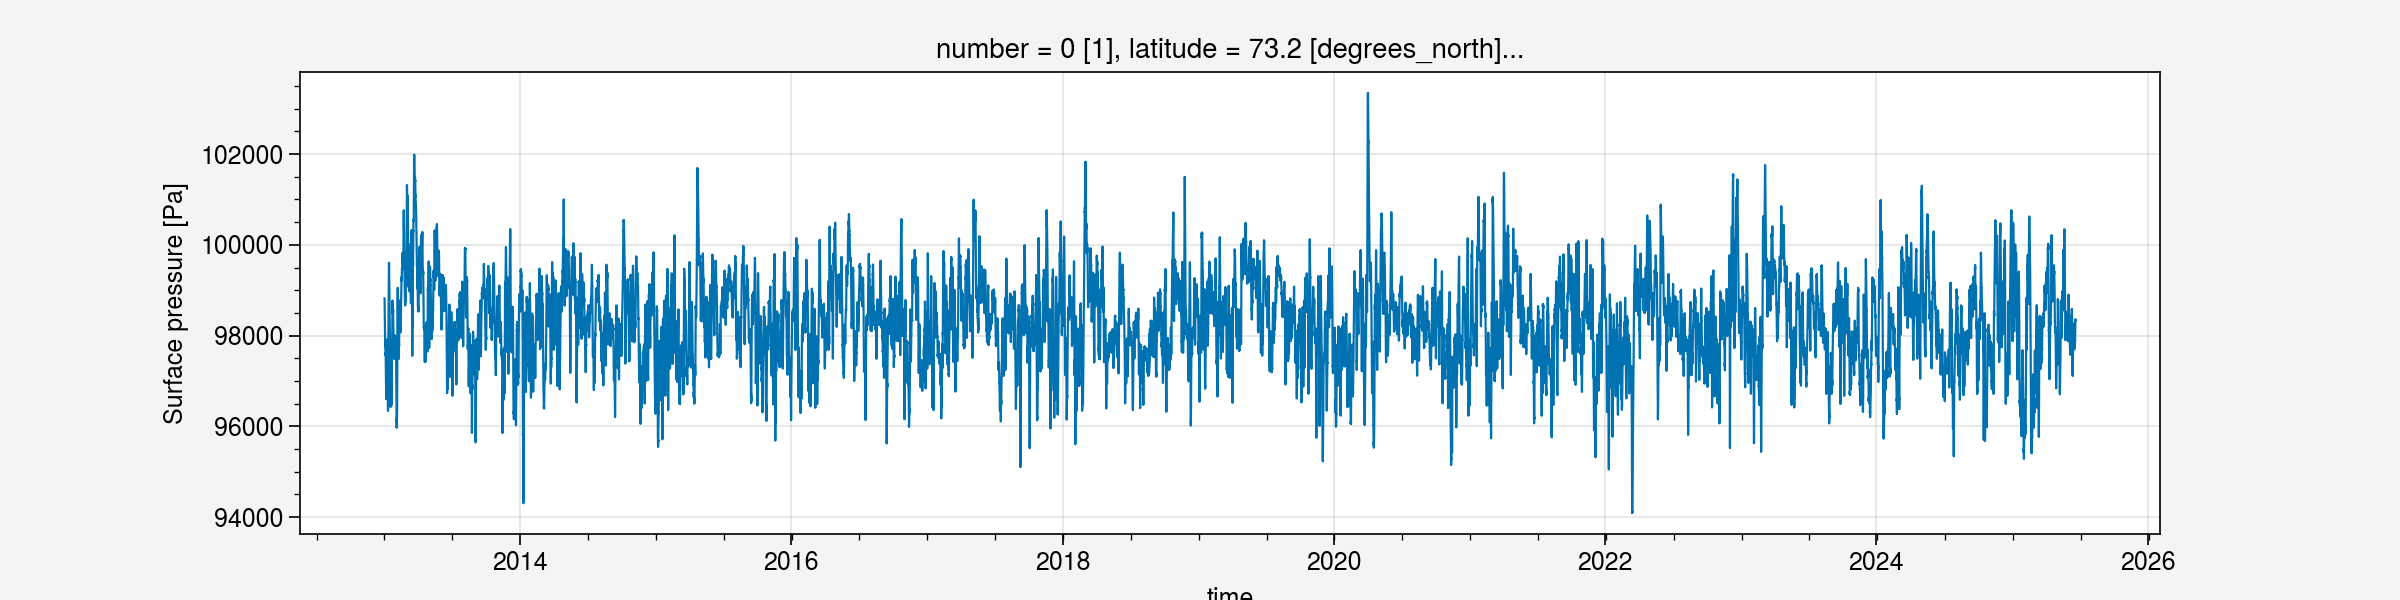

In [60]:
%matplotlib inline
ds_sp.sp[:, 0, 0].plot(figsize=(12,3), lw=0.8)

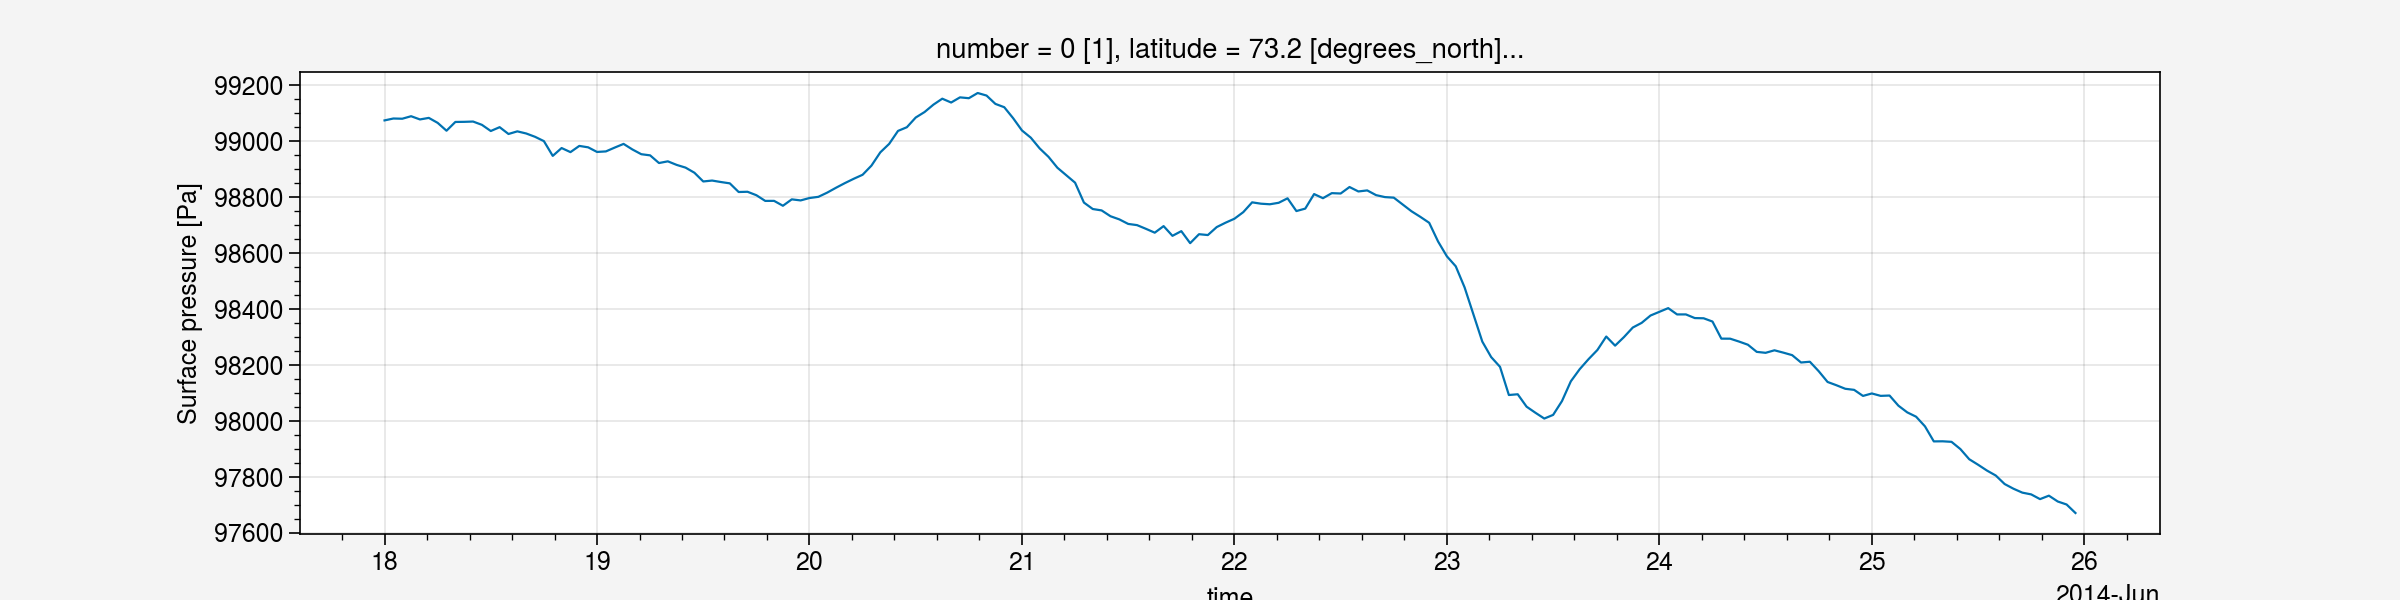

In [63]:
%matplotlib inline
ds_sp.sp[:, 0, 0].sel(valid_time=slice('2014-06-18','2014-06-25')).plot(figsize=(12,3), lw=0.8)

## Gather all variable in one dataset

In [64]:
ds_all['sp'] = ds_sp.sp
ds_all

<xarray.Dataset> Size: 15MB
Dimensions:     (valid_time: 109251, latitude: 2, longitude: 2)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01T01:00:00 ... 202...
  * latitude    (latitude) float64 16B 73.2 73.1
  * longitude   (longitude) float64 16B -80.05 -79.95
    number      int64 8B 0
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    ssrd        (valid_time, latitude, longitude) float32 2MB 0.0 0.0 ... 120.4
    ssr         (valid_time, latitude, longitude) float32 2MB 0.0 0.0 ... nan
    ssru        (valid_time, latitude, longitude) float32 2MB 0.0 0.0 ... nan
    strd        (valid_time, latitude, longitude) float32 2MB 135.2 ... 273.2
    str         (valid_time, latitude, longitude) float32 2MB -41.65 ... nan
    stru        (valid_time, latitude, longitude) float32 2MB 176.8 ... nan
    sp          (valid_time, latitude, longitude) float32 2MB 9.882e+04 ... 9...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-23T20:50 GRIB to CDM+CF via cfgrib-0.9.1...

### Add Bylot TUNDRA coordinates

In [65]:
ds_all.latitude

<xarray.DataArray 'latitude' (latitude: 2)> Size: 16B
array([73.2, 73.1])
Coordinates:
  * latitude  (latitude) float64 16B 73.2 73.1
    number    int64 8B 0
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing

In [66]:
# Ajouter les nouvelles coordonnées
new_lats = np.sort(np.append(ds_all.latitude.values, lat))
new_lons = np.sort(np.append(ds_all.longitude.values, lon))

In [67]:
new_lats

array([73.1   , 73.1504, 73.2   ])

In [68]:
new_lons

array([-80.05  , -80.0046, -79.95  ])

In [69]:
ds_interp = ds_all.interp(latitude=new_lats, longitude=new_lons)
ds_interp

<xarray.Dataset> Size: 58MB
Dimensions:     (valid_time: 109251, latitude: 3, longitude: 3)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 874kB 2013-01-01T01:00:00 ... 202...
    number      int64 8B 0
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
  * latitude    (latitude) float64 24B 73.1 73.15 73.2
  * longitude   (longitude) float64 24B -80.05 -80.0 -79.95
Data variables:
    ssrd        (valid_time, latitude, longitude) float64 8MB 0.0 0.0 ... 125.9
    ssr         (valid_time, latitude, longitude) float64 8MB 0.0 0.0 ... nan
    ssru        (valid_time, latitude, longitude) float64 8MB 0.0 0.0 ... nan
    strd        (valid_time, latitude, longitude) float64 8MB 140.2 ... 268.1
    str         (valid_time, latitude, longitude) float64 8MB -37.65 ... nan
    stru        (valid_time, latitude, longitude) float64 8MB 177.9 ... nan
    sp          (valid_time, latitude, longitude) float64 8MB 9.932e+04 ... 9...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-23T20:50 GRIB to CDM+CF via cfgrib-0.9.1...

In [70]:
import warnings
warnings.filterwarnings('ignore')

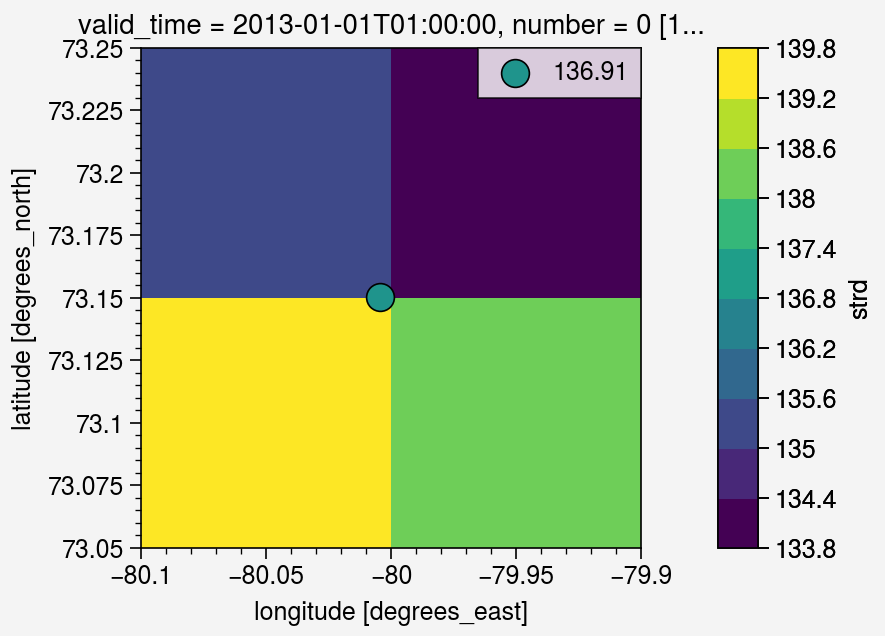

In [74]:
%matplotlib inline
fig, ax = pplt.subplots()

i_time = 0
pcolor = ds_all.strd[i_time].plot.pcolormesh(ax=ax)

# Récupérer les limites de la colorbar
vmin, vmax = pcolor.get_clim()

value = ds_interp.strd.sel(latitude=lat, longitude=lon)[i_time].item()  # Valeur scalaire

# Obtenir la couleur correspondante
import matplotlib.colors as mcolors  # Utilisation de matplotlib pour normaliser
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)  # Normalisation correcte
cmap = pcolor.get_cmap()
color = cmap(norm(value))  # Convertir la valeur en couleur

# Ajouter le point avec la bonne couleur
ax.scatter(lon, lat, color=color, edgecolors="black", s=100, label=f"{value:.2f}")

# Afficher la légende
ax.legend()
pplt.show()

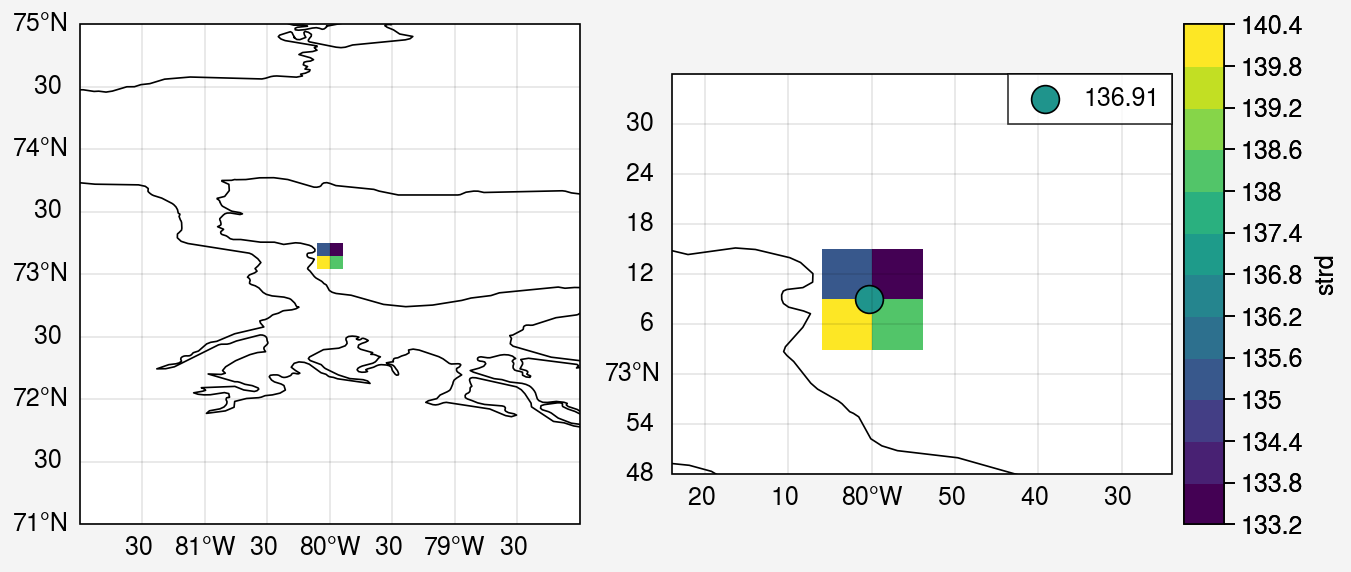

In [72]:
%matplotlib inline
fig, axs = pplt.subplots(proj='cyl', ncols=2)

i_time = 0
ax = axs[0]
ax.pcolormesh(ds_all.strd[i_time], cmap='viridis')

ax.format(
    borders=True, 
    coast=True, 
    labels=True, 
    latlim=(71, 75), 
    lonlim=(-82, -78),
    reso='hi'
)

ax = axs[1]
ax.pcolormesh(ds_all.strd[i_time], cmap='viridis', colorbar='r')

ax.format(
    borders=True, 
    coast=True, 
    labels=True, 
    latlim=(72.8, 73.6), 
    lonlim=(-79.4, -80.4),
    reso='hi'
)


# Récupérer les limites de la colorbar
vmin, vmax = pcolor.get_clim()

value = ds_interp.strd.sel(latitude=lat, longitude=lon)[i_time].item()  # Valeur scalaire

# Obtenir la couleur correspondante
import matplotlib.colors as mcolors  # Utilisation de matplotlib pour normaliser
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)  # Normalisation correcte
cmap = pcolor.get_cmap()
color = cmap(norm(value))  # Convertir la valeur en couleur

# Ajouter le point avec la bonne couleur
ax.scatter(lon, lat, color=color, edgecolors="black", s=100, label=f"{value:.2f}")
ax.legend()

#reso : {'lo', 'med', 'hi', 'x-hi', 'xx-hi'}, optional


In [75]:
ds_interp.latitude.values

array([73.1   , 73.1504, 73.2   ])

In [76]:
ds_interp.longitude.values

array([-80.05  , -80.0046, -79.95  ])

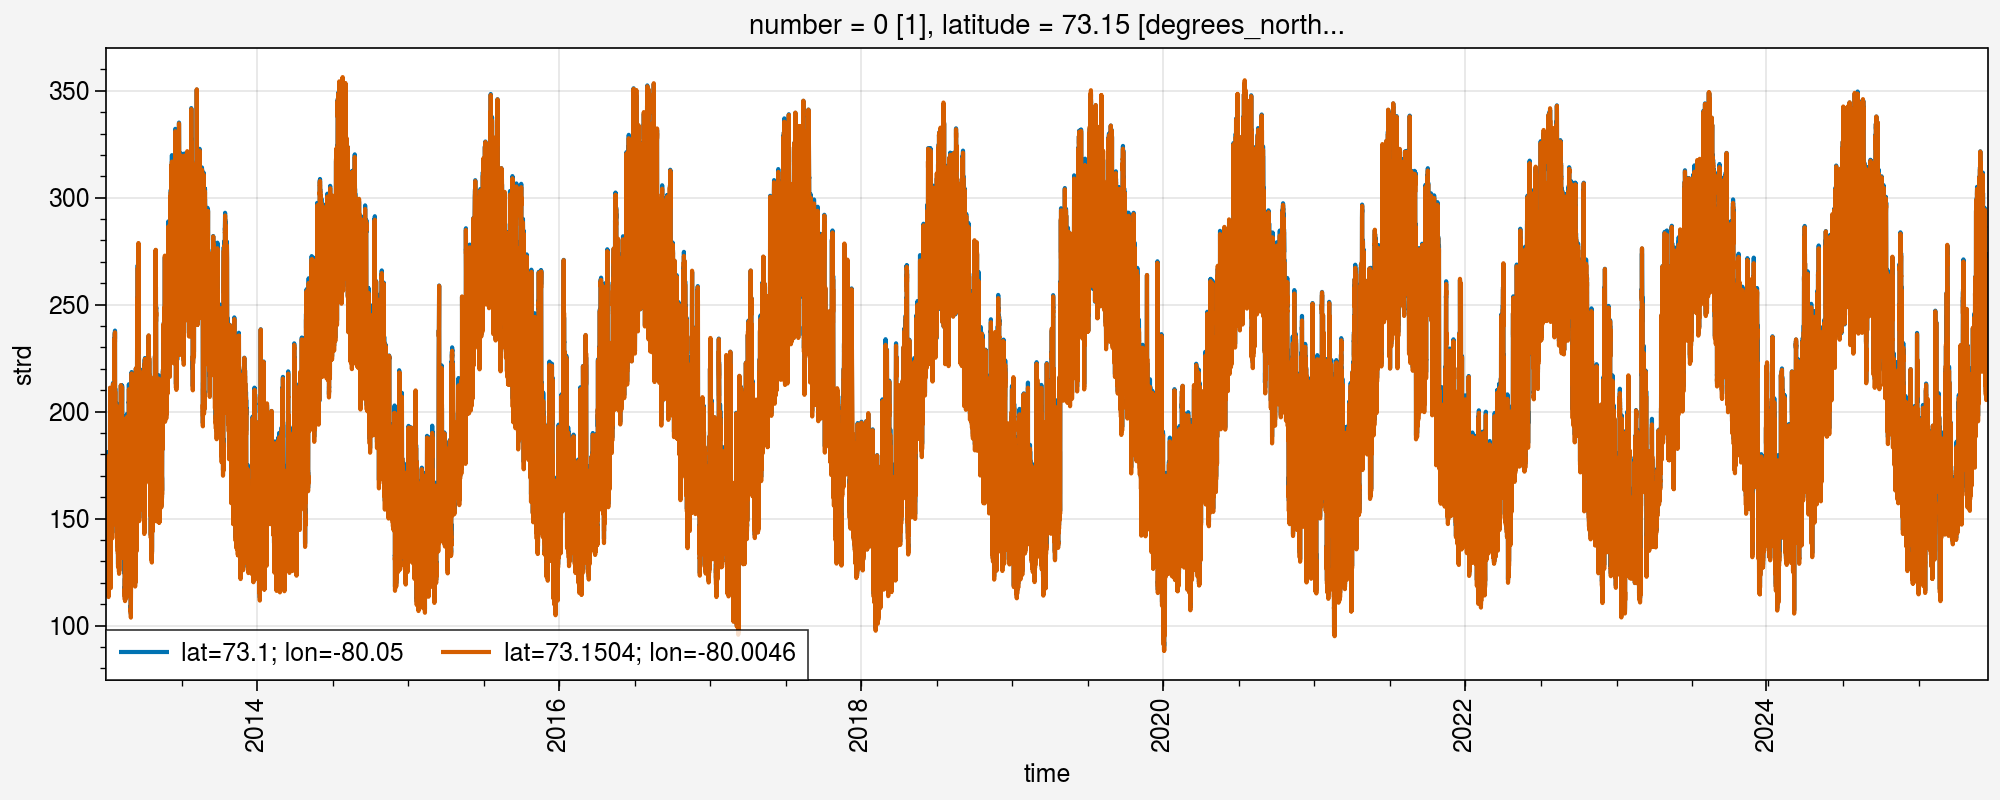

In [77]:
%matplotlib inline
fig, axs = pplt.subplots(figsize=(10,4))

ds_interp.strd.sel(latitude=73.1, longitude=-80.05).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.strd.sel(latitude=73.1504, longitude=-80.0046).plot(ax=axs[0], label='lat=73.1504; lon=-80.0046')
axs.legend()

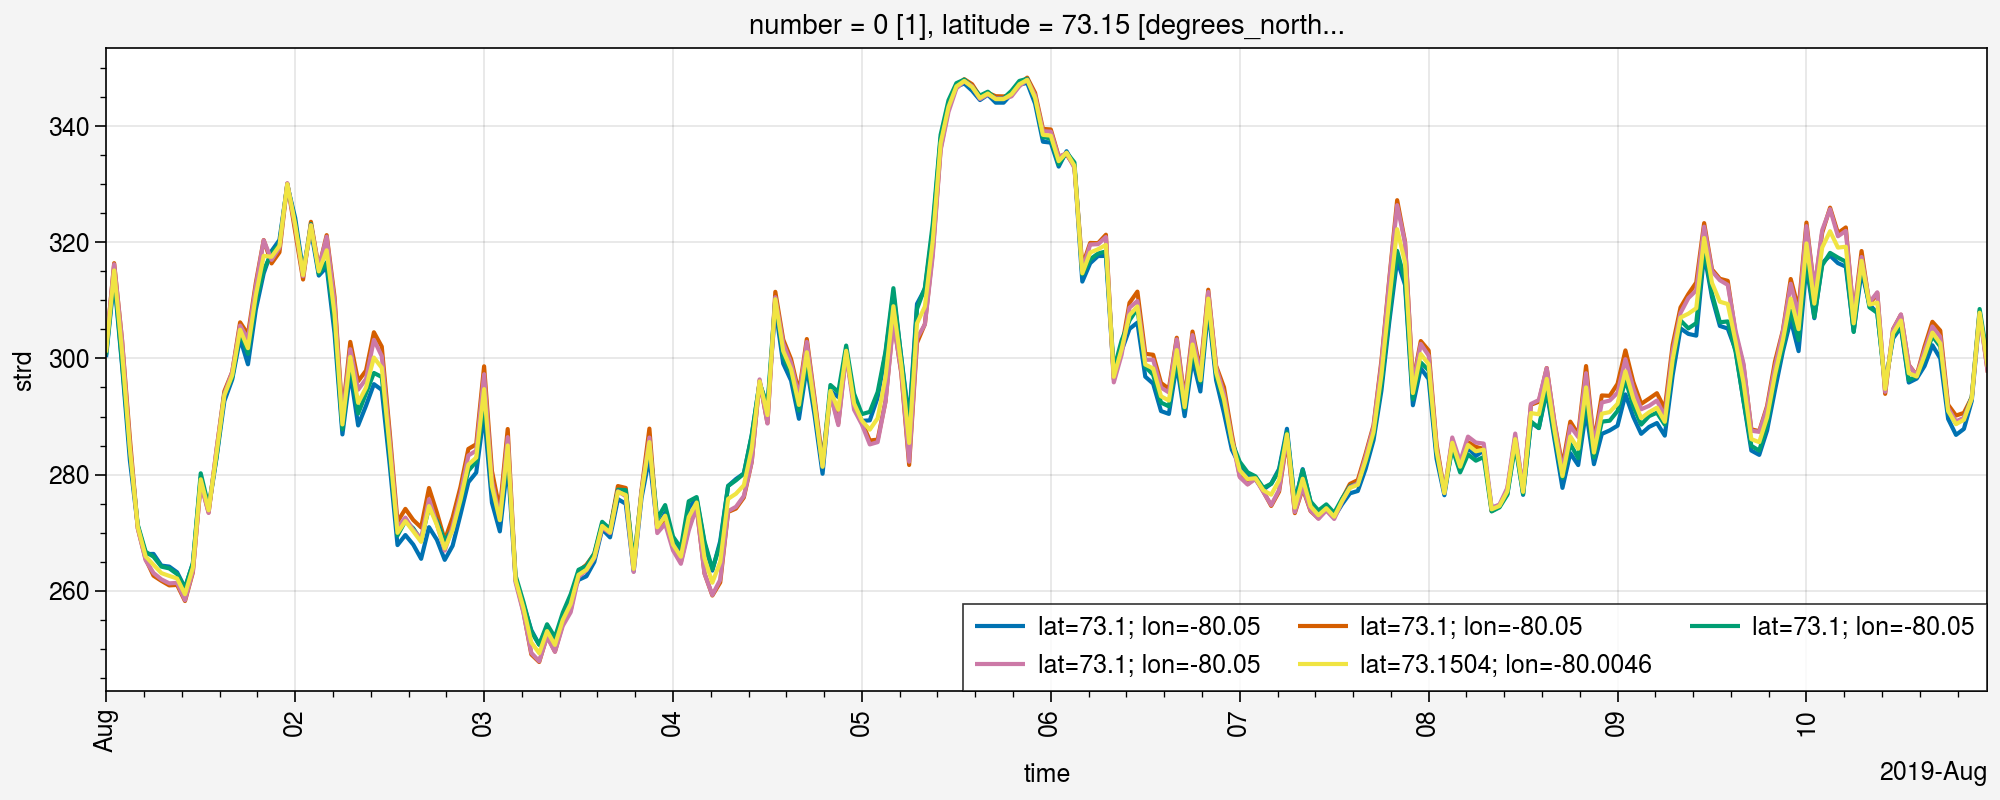

In [86]:
%matplotlib inline
fig, axs = pplt.subplots(figsize=(10,4))

ds_interp.strd.sel(latitude=73.1, longitude=-80.05, valid_time=slice('2019-08-01', '2019-08-10')).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.strd.sel(latitude=73.2, longitude=-79.95, valid_time=slice('2019-08-01', '2019-08-10')).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.strd.sel(latitude=73.1, longitude=-79.95, valid_time=slice('2019-08-01', '2019-08-10')).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.strd.sel(latitude=73.2, longitude=-80.05, valid_time=slice('2019-08-01', '2019-08-10')).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.strd.sel(latitude=73.1504, longitude=-80.0046, valid_time=slice('2019-08-01', '2019-08-10')).plot(ax=axs[0], label='lat=73.1504; lon=-80.0046')
axs.legend()

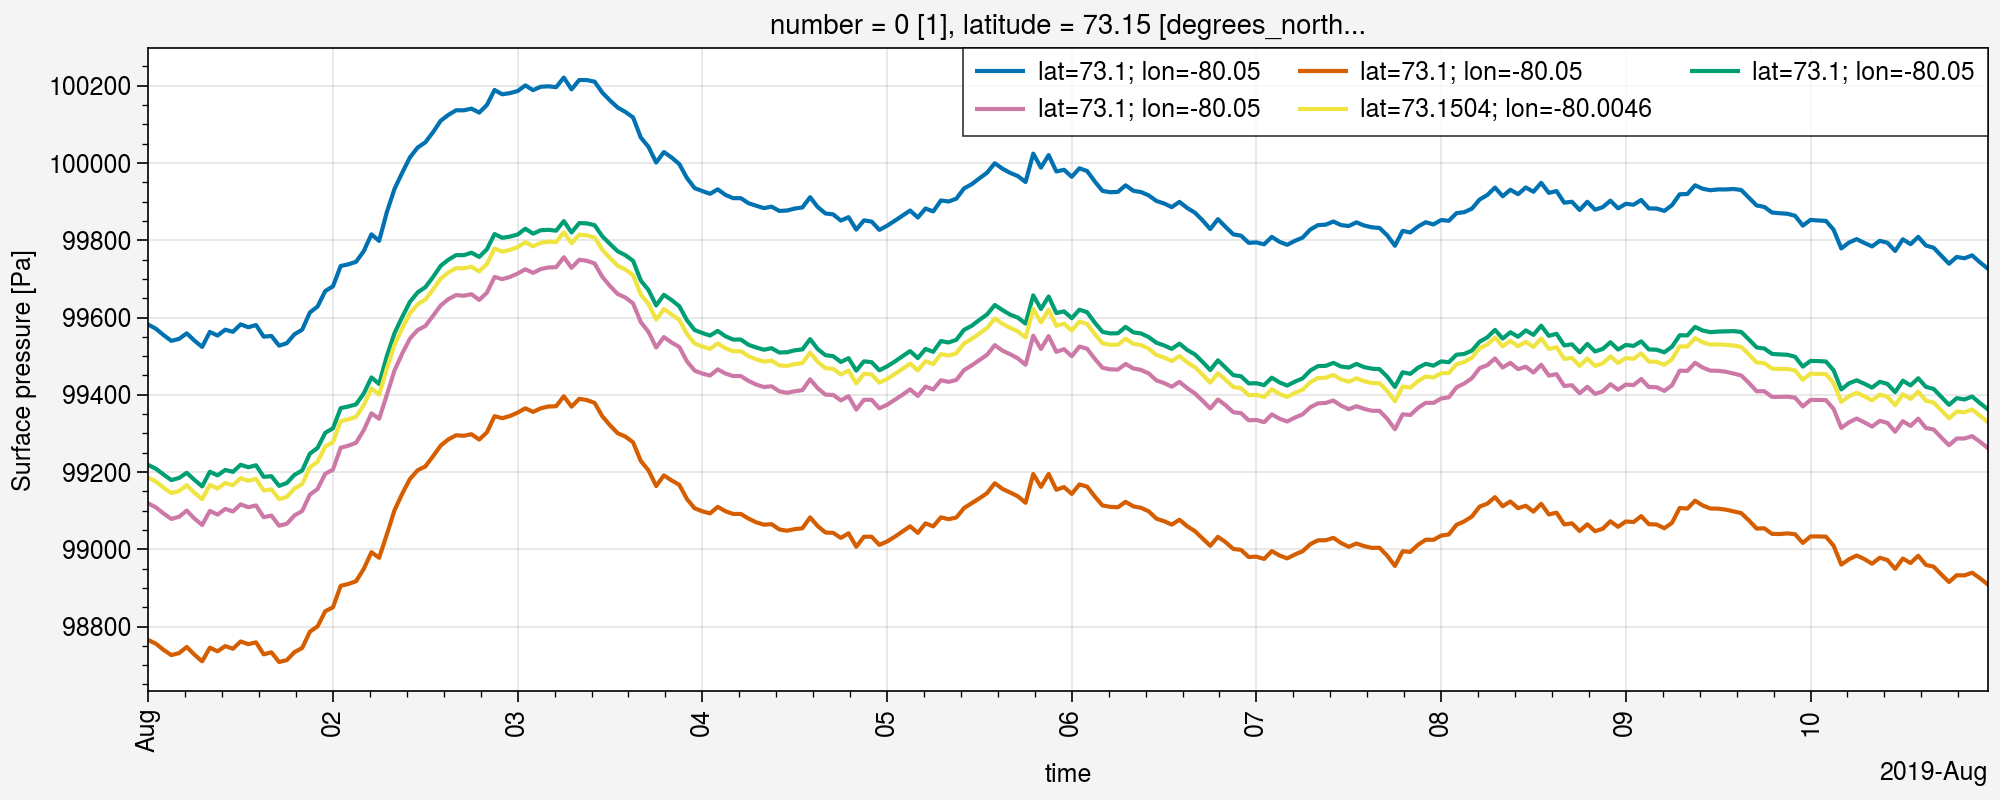

In [87]:
%matplotlib inline
fig, axs = pplt.subplots(figsize=(10,4))

ds_interp.sp.sel(latitude=73.1, longitude=-80.05, valid_time=slice('2019-08-01', '2019-08-10')).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.sp.sel(latitude=73.2, longitude=-79.95, valid_time=slice('2019-08-01', '2019-08-10')).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.sp.sel(latitude=73.1, longitude=-79.95, valid_time=slice('2019-08-01', '2019-08-10')).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.sp.sel(latitude=73.2, longitude=-80.05, valid_time=slice('2019-08-01', '2019-08-10')).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.sp.sel(latitude=73.1504, longitude=-80.0046, valid_time=slice('2019-08-01', '2019-08-10')).plot(ax=axs[0], label='lat=73.1504; lon=-80.0046')
axs.legend()

Need to divide by 3600 to get W m-2 s-1

## Export data to .dat or .csv 
Only pixel including Bylot and interpolated values

In [88]:
ds_interp_out = ds_interp.drop('number').drop('expver').rename({'valid_time': 'time', 'latitude': 'lat', 'longitude': 'lon'})
ds_interp_out = ds_interp_out.sel(time=slice('2013-07', '2025-05'))

ds_interp_out_grid = ds_interp_out.sel(lat=73.2, lon=-80.05)
ds_interp_out_interp = ds_interp_out.sel(lat=73.1504, lon=-80.0046)
ds_interp_out_grid

<xarray.Dataset> Size: 7MB
Dimensions:  (time: 104472)
Coordinates:
  * time     (time) datetime64[ns] 836kB 2013-07-01 ... 2025-05-31T23:00:00
    lat      float64 8B 73.2
    lon      float64 8B -80.05
Data variables:
    ssrd     (time) float64 836kB 90.37 65.57 43.37 25.08 ... 173.2 186.0 232.3
    ssr      (time) float64 836kB 43.35 31.53 20.55 11.71 ... 71.32 75.85 94.32
    ssru     (time) float64 836kB 47.02 34.04 22.82 13.37 ... 101.9 110.1 138.0
    strd     (time) float64 836kB 311.8 317.2 316.5 317.1 ... 312.5 311.3 302.0
    str      (time) float64 836kB -12.08 -5.407 -5.314 ... -9.459 -9.52 -18.24
    stru     (time) float64 836kB 323.9 322.6 321.8 320.8 ... 322.0 320.8 320.3
    sp       (time) float64 836kB 9.797e+04 9.792e+04 ... 9.798e+04 9.804e+04
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-23T20:50 GRIB to CDM+CF via cfgrib-0.9.1...

In [91]:
df_grid = ds_interp_out_grid.to_dataframe()
new_order = ['strd', 'str', 'stru', 'ssrd', 'ssr', 'ssru', 'sp', 'lat', 'lon']
df_grid = df_grid[new_order]
df_grid

strd        str        stru        ssrd  \
time                                                                 
2013-07-01 00:00:00  311.816101 -12.080243  323.896362   90.367775   
2013-07-01 01:00:00  317.185150  -5.407442  322.592560   65.571388   
2013-07-01 02:00:00  316.479736  -5.313654  321.793365   43.371567   
2013-07-01 03:00:00  317.086609  -3.740655  320.827271   25.078993   
2013-07-01 04:00:00  318.166748  -1.782557  319.949310   21.134705   
...                         ...        ...         ...         ...   
2025-05-31 19:00:00  306.608887 -16.322779  322.931671  279.337494   
2025-05-31 20:00:00  310.183319 -12.558333  322.741669  229.185562   
2025-05-31 21:00:00  312.528320  -9.458889  321.987213  173.245834   
2025-05-31 22:00:00  311.262207  -9.520208  320.782440  185.991394   
2025-05-31 23:00:00  302.013885 -18.244444  320.258331  232.270828   

                            ssr        ssru            sp   lat    lon  
time                                                                    
2013-07-01 00:00:00   43.349445   47.018333  97969.937500  73.2 -80.05  
2013-07-01 01:00:00   31.534243   34.037145  97921.828125  73.2 -80.05  
2013-07-01 02:00:00   20.546934   22.824633  97862.671875  73.2 -80.05  
2013-07-01 03:00:00   11.709435   13.369558  97814.718750  73.2 -80.05  
2013-07-01 04:00:00    9.615847   11.518859  97778.937500  73.2 -80.05  
...                         ...         ...           ...   ...    ...  
2025-05-31 19:00:00  116.647224  162.690277  97914.578125  73.2 -80.05  
2025-05-31 20:00:00   95.413612  133.771942  97931.437500  73.2 -80.05  
2025-05-31 21:00:00   71.322502  101.923332  97959.250000  73.2 -80.05  
2025-05-31 22:00:00   75.854309  110.137085  97984.640625  73.2 -80.05  
2025-05-31 23:00:00   94.319168  137.951660  98040.687500  73.2 -80.05  

[104472 rows x 9 columns]

In [93]:
df_grid.to_csv(path_land+'/ERA5_Land_h_all_73.2N_80.05W_201307-202505_Bylot_UTC_0005.csv')

In [94]:
df_interp = ds_interp_out_interp.to_dataframe()
new_order = ['strd', 'str', 'stru', 'ssrd', 'ssr', 'ssru', 'sp', 'lat', 'lon']
df_interp = df_interp[new_order]
df_interp

strd        str        stru        ssrd  \
time                                                                 
2013-07-01 00:00:00  313.061144 -16.325903  329.387056   86.172032   
2013-07-01 01:00:00  318.047064  -9.349311  327.396358   64.536582   
2013-07-01 02:00:00  317.365463  -8.644178  326.009631   41.950348   
2013-07-01 03:00:00  317.864502  -6.508418  324.372924   24.563687   
2013-07-01 04:00:00  318.832488  -4.149700  322.982200   20.113373   
...                         ...        ...         ...         ...   
2025-05-31 19:00:00  306.791236 -16.838602  323.629840  288.161665   
2025-05-31 20:00:00  310.783748 -12.714991  323.498750  228.237715   
2025-05-31 21:00:00  313.212552  -9.358277  322.570829  169.072736   
2025-05-31 22:00:00  311.918248  -9.311958  321.230207  182.399283   
2025-05-31 23:00:00  302.530474 -18.140467  320.670932  229.118463   

                            ssr        ssru            sp      lat      lon  
time                                                                         
2013-07-01 00:00:00   53.461389   32.710645  98038.095149  73.1504 -80.0046  
2013-07-01 01:00:00   40.432991   24.103591  97991.113182  73.1504 -80.0046  
2013-07-01 02:00:00   25.917430   16.032919  97931.821524  73.1504 -80.0046  
2013-07-01 03:00:00   15.077949    9.485739  97882.509759  73.1504 -80.0046  
2013-07-01 04:00:00   12.044849    8.068524  97847.005259  73.1504 -80.0046  
...                         ...         ...           ...      ...      ...  
2025-05-31 19:00:00  120.512304  167.649371  98065.304148  73.1504 -80.0046  
2025-05-31 20:00:00   95.232266  133.005450  98083.516115  73.1504 -80.0046  
2025-05-31 21:00:00   69.877532   99.195204  98111.362865  73.1504 -80.0046  
2025-05-31 22:00:00   74.797972  107.601313  98137.522722  73.1504 -80.0046  
2025-05-31 23:00:00   93.622815  135.495646  98194.431523  73.1504 -80.0046  

[104472 rows x 9 columns]

In [95]:
df_interp.to_csv(path_land+'/ERA5_Land_h_all_73.1504N_80.0046W_201307-202505_Bylot_UTC_0005.csv')

## Check ERA5 vs ERA Land

In [111]:
ERA5_land_grid = pd.read_csv(path_land+'/ERA5_Land_h_all_73.2N_80.05W_201307-202505_Bylot_UTC_0005.csv', index_col='time', parse_dates=['time'])
ERA5_land_grid

strd        str        stru        ssrd  \
time                                                                 
2013-07-01 00:00:00  311.816101 -12.080243  323.896362   90.367775   
2013-07-01 01:00:00  317.185150  -5.407442  322.592560   65.571388   
2013-07-01 02:00:00  316.479736  -5.313654  321.793365   43.371567   
2013-07-01 03:00:00  317.086609  -3.740655  320.827271   25.078993   
2013-07-01 04:00:00  318.166748  -1.782557  319.949310   21.134705   
...                         ...        ...         ...         ...   
2025-05-31 19:00:00  306.608887 -16.322779  322.931671  279.337494   
2025-05-31 20:00:00  310.183319 -12.558333  322.741669  229.185562   
2025-05-31 21:00:00  312.528320  -9.458889  321.987213  173.245834   
2025-05-31 22:00:00  311.262207  -9.520208  320.782440  185.991394   
2025-05-31 23:00:00  302.013885 -18.244444  320.258331  232.270828   

                            ssr        ssru            sp   lat    lon  
time                                                                    
2013-07-01 00:00:00   43.349445   47.018333  97969.937500  73.2 -80.05  
2013-07-01 01:00:00   31.534243   34.037145  97921.828125  73.2 -80.05  
2013-07-01 02:00:00   20.546934   22.824633  97862.671875  73.2 -80.05  
2013-07-01 03:00:00   11.709435   13.369558  97814.718750  73.2 -80.05  
2013-07-01 04:00:00    9.615847   11.518859  97778.937500  73.2 -80.05  
...                         ...         ...           ...   ...    ...  
2025-05-31 19:00:00  116.647224  162.690277  97914.578125  73.2 -80.05  
2025-05-31 20:00:00   95.413612  133.771942  97931.437500  73.2 -80.05  
2025-05-31 21:00:00   71.322502  101.923332  97959.250000  73.2 -80.05  
2025-05-31 22:00:00   75.854309  110.137085  97984.640625  73.2 -80.05  
2025-05-31 23:00:00   94.319168  137.951660  98040.687500  73.2 -80.05  

[104472 rows x 9 columns]

In [112]:
ERA5_land_interp = pd.read_csv(path_land+'/ERA5_Land_h_all_73.1504N_80.0046W_201307-202505_Bylot_UTC_0005.csv', index_col='time', parse_dates=['time'])
ERA5_land_interp

strd        str        stru        ssrd  \
time                                                                 
2013-07-01 00:00:00  313.061144 -16.325903  329.387056   86.172032   
2013-07-01 01:00:00  318.047064  -9.349311  327.396358   64.536582   
2013-07-01 02:00:00  317.365463  -8.644178  326.009631   41.950348   
2013-07-01 03:00:00  317.864502  -6.508418  324.372924   24.563687   
2013-07-01 04:00:00  318.832488  -4.149700  322.982200   20.113373   
...                         ...        ...         ...         ...   
2025-05-31 19:00:00  306.791236 -16.838602  323.629840  288.161665   
2025-05-31 20:00:00  310.783748 -12.714991  323.498750  228.237715   
2025-05-31 21:00:00  313.212552  -9.358277  322.570829  169.072736   
2025-05-31 22:00:00  311.918248  -9.311958  321.230207  182.399283   
2025-05-31 23:00:00  302.530474 -18.140467  320.670932  229.118463   

                            ssr        ssru            sp      lat      lon  
time                                                                         
2013-07-01 00:00:00   53.461389   32.710645  98038.095149  73.1504 -80.0046  
2013-07-01 01:00:00   40.432991   24.103591  97991.113182  73.1504 -80.0046  
2013-07-01 02:00:00   25.917430   16.032919  97931.821524  73.1504 -80.0046  
2013-07-01 03:00:00   15.077949    9.485739  97882.509759  73.1504 -80.0046  
2013-07-01 04:00:00   12.044849    8.068524  97847.005259  73.1504 -80.0046  
...                         ...         ...           ...      ...      ...  
2025-05-31 19:00:00  120.512304  167.649371  98065.304148  73.1504 -80.0046  
2025-05-31 20:00:00   95.232266  133.005450  98083.516115  73.1504 -80.0046  
2025-05-31 21:00:00   69.877532   99.195204  98111.362865  73.1504 -80.0046  
2025-05-31 22:00:00   74.797972  107.601313  98137.522722  73.1504 -80.0046  
2025-05-31 23:00:00   93.622815  135.495646  98194.431523  73.1504 -80.0046  

[104472 rows x 9 columns]

In [113]:
ERA5_grid = pd.read_csv(path+'/ERA5_h_all_73.1N_80.05W_201307-202505_Bylot_UTC_0005.csv', index_col='time', parse_dates=['time'])
ERA5_grid

strd        str        stru        ssrd  \
time                                                                 
2013-07-01 00:00:00  315.046936  -0.916571  315.963501   79.895958   
2013-07-01 01:00:00  319.215271   3.479315  315.735962   62.419113   
2013-07-01 02:00:00  318.663055   3.223636  315.439423   39.638577   
2013-07-01 03:00:00  318.901123   3.693412  315.207703   23.819931   
2013-07-01 04:00:00  319.697723   4.564531  315.133209   18.759062   
...                         ...        ...         ...         ...   
2025-05-31 19:00:00  307.912567  -8.774007  316.686554  290.408539   
2025-05-31 20:00:00  312.209381  -4.226526  316.435913  222.138535   
2025-05-31 21:00:00  314.545563  -1.321130  315.866699  161.668762   
2025-05-31 22:00:00  312.601593  -3.132405  315.733978  181.705902   
2025-05-31 23:00:00  302.667633 -13.198252  315.865906  227.810883   

                            ssr        ssru            msl   lat    lon  
time                                                                     
2013-07-01 00:00:00   48.409863   31.486094  100666.820312  73.1 -80.05  
2013-07-01 01:00:00   40.064514   22.354601  100635.570312  73.1 -80.05  
2013-07-01 02:00:00   24.227877   15.410699  100565.257812  73.1 -80.05  
2013-07-01 03:00:00   14.677595    9.142335  100494.359375  73.1 -80.05  
2013-07-01 04:00:00   10.979135    7.779928  100470.750000  73.1 -80.05  
...                         ...         ...            ...   ...    ...  
2025-05-31 19:00:00  127.763557  162.644958  100722.703125  73.1 -80.05  
2025-05-31 20:00:00   94.166962  127.971581  100746.929688  73.1 -80.05  
2025-05-31 21:00:00   67.808128   93.860641  100772.234375  73.1 -80.05  
2025-05-31 22:00:00   79.368141  102.337761  100829.476562  73.1 -80.05  
2025-05-31 23:00:00  103.137482  124.673401  100862.312500  73.1 -80.05  

[104472 rows x 9 columns]

In [119]:
ds_ERA5_grid = ERA5_grid.set_index(['lat', 'lon'], append=True).to_xarray()
ds_ERA5_land_grid = ERA5_land_grid.set_index(['lat', 'lon'], append=True).to_xarray()
ds_ERA5_land_interp = ERA5_land_interp.set_index(['lat', 'lon'], append=True).to_xarray()
ds_ERA5_land_interp

<xarray.Dataset> Size: 7MB
Dimensions:  (time: 104472, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 836kB 2013-07-01 ... 2025-05-31T23:00:00
  * lat      (lat) float64 8B 73.15
  * lon      (lon) float64 8B -80.0
Data variables:
    strd     (time, lat, lon) float64 836kB 313.1 318.0 317.4 ... 311.9 302.5
    str      (time, lat, lon) float64 836kB -16.33 -9.349 ... -9.312 -18.14
    stru     (time, lat, lon) float64 836kB 329.4 327.4 326.0 ... 321.2 320.7
    ssrd     (time, lat, lon) float64 836kB 86.17 64.54 41.95 ... 182.4 229.1
    ssr      (time, lat, lon) float64 836kB 53.46 40.43 25.92 ... 74.8 93.62
    ssru     (time, lat, lon) float64 836kB 32.71 24.1 16.03 ... 107.6 135.5
    sp       (time, lat, lon) float64 836kB 9.804e+04 9.799e+04 ... 9.819e+04

In [124]:
str(ds_ERA5_land_interp.lat.values.item(0))

'73.1504'

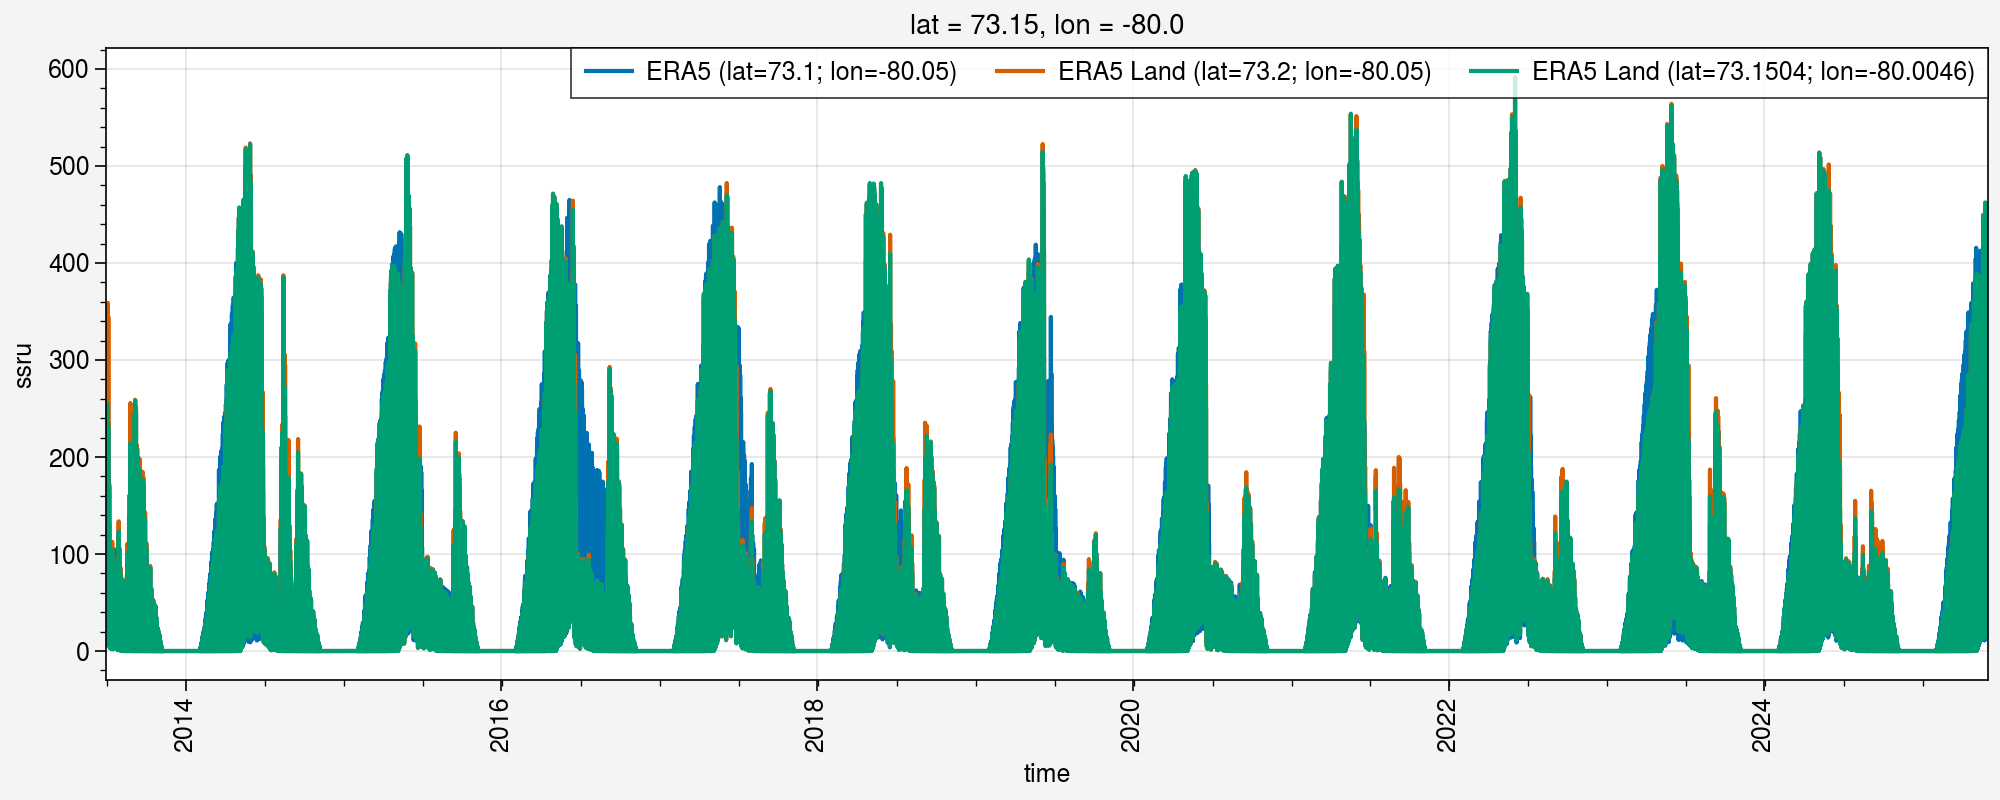

In [131]:
%matplotlib inline
fig, axs = pplt.subplots(figsize=(10,4))

var='ssru'
time=slice(None, None)
# time=slice('2019-08-01', '2019-08-10')

ds_ERA5_grid[var].sel(time=time).plot(ax=axs[0], label='ERA5 (lat='+str(ds_ERA5_grid.lat.values.item(0))+'; lon='+str(ds_ERA5_grid.lon.values.item(0))+')')
ds_ERA5_land_grid[var].sel(time=time).plot(ax=axs[0], label='ERA5 Land (lat='+str(ds_ERA5_land_grid.lat.values.item(0))+'; lon='+str(ds_ERA5_land_grid.lon.values.item(0))+')')
ds_ERA5_land_interp[var].sel(time=time).plot(ax=axs[0], label='ERA5 Land (lat='+str(ds_ERA5_land_interp.lat.values.item(0))+'; lon='+str(ds_ERA5_land_interp.lon.values.item(0))+')')
axs.legend()

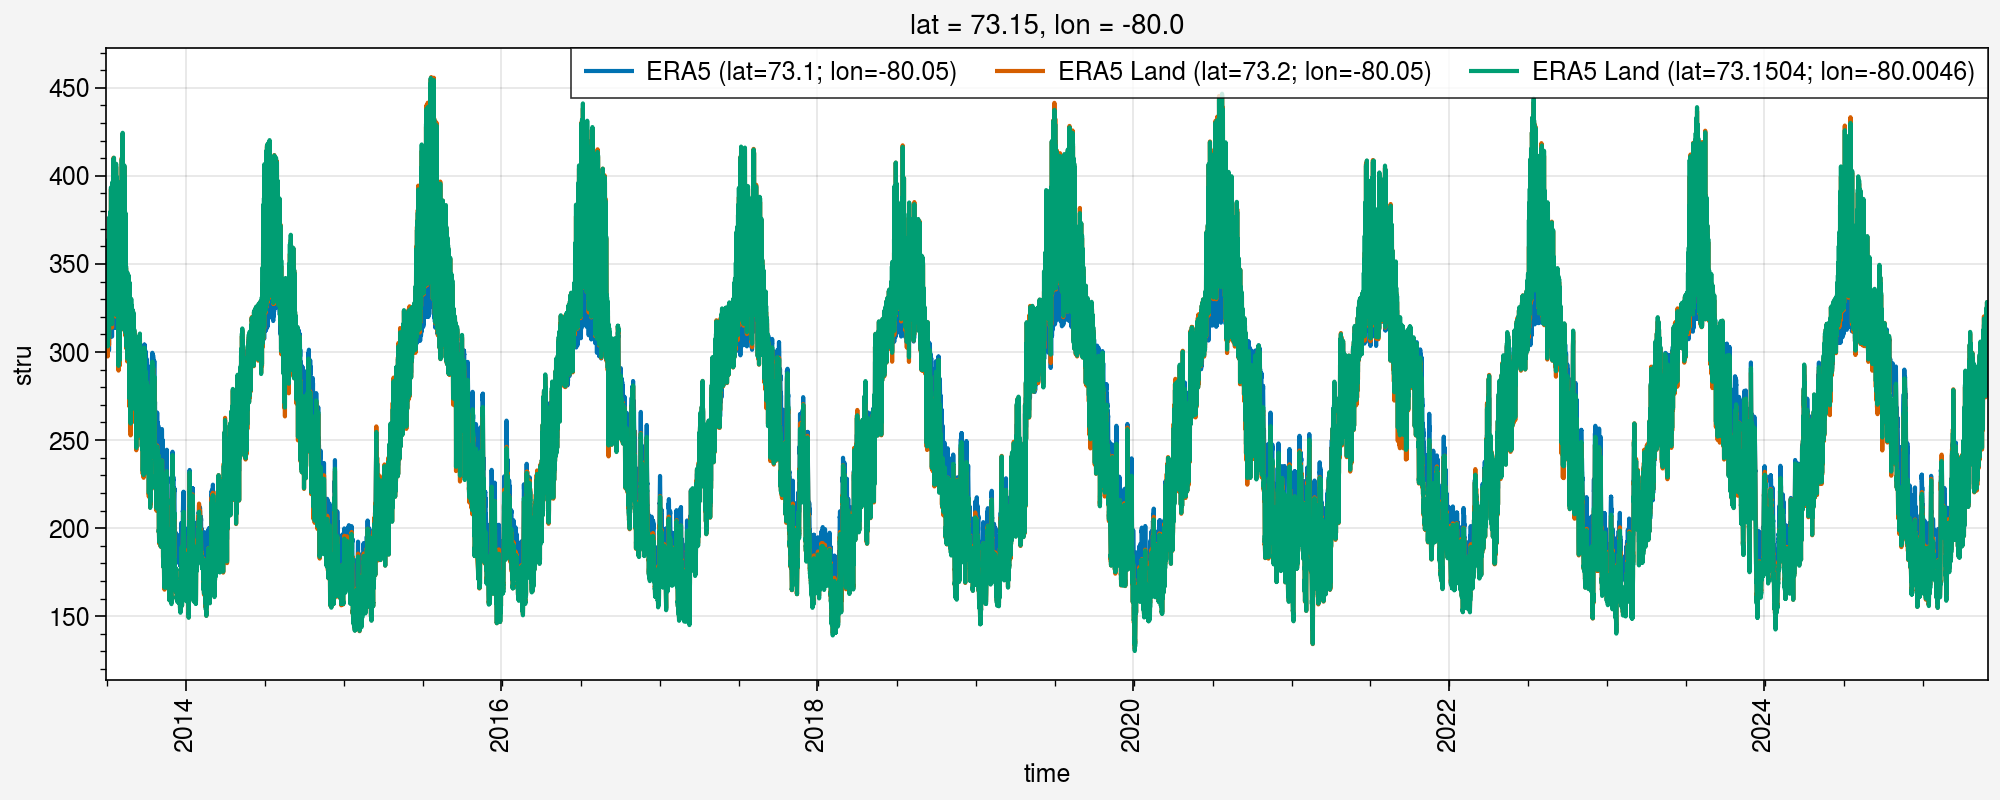

In [134]:
%matplotlib inline
fig, axs = pplt.subplots(figsize=(10,4))

var='stru'
time=slice(None, None)
# time=slice('2019-08-01', '2019-08-10')

ds_ERA5_grid[var].sel(time=time).plot(ax=axs[0], label='ERA5 (lat='+str(ds_ERA5_grid.lat.values.item(0))+'; lon='+str(ds_ERA5_grid.lon.values.item(0))+')')
ds_ERA5_land_grid[var].sel(time=time).plot(ax=axs[0], label='ERA5 Land (lat='+str(ds_ERA5_land_grid.lat.values.item(0))+'; lon='+str(ds_ERA5_land_grid.lon.values.item(0))+')')
ds_ERA5_land_interp[var].sel(time=time).plot(ax=axs[0], label='ERA5 Land (lat='+str(ds_ERA5_land_interp.lat.values.item(0))+'; lon='+str(ds_ERA5_land_interp.lon.values.item(0))+')')
axs.legend()

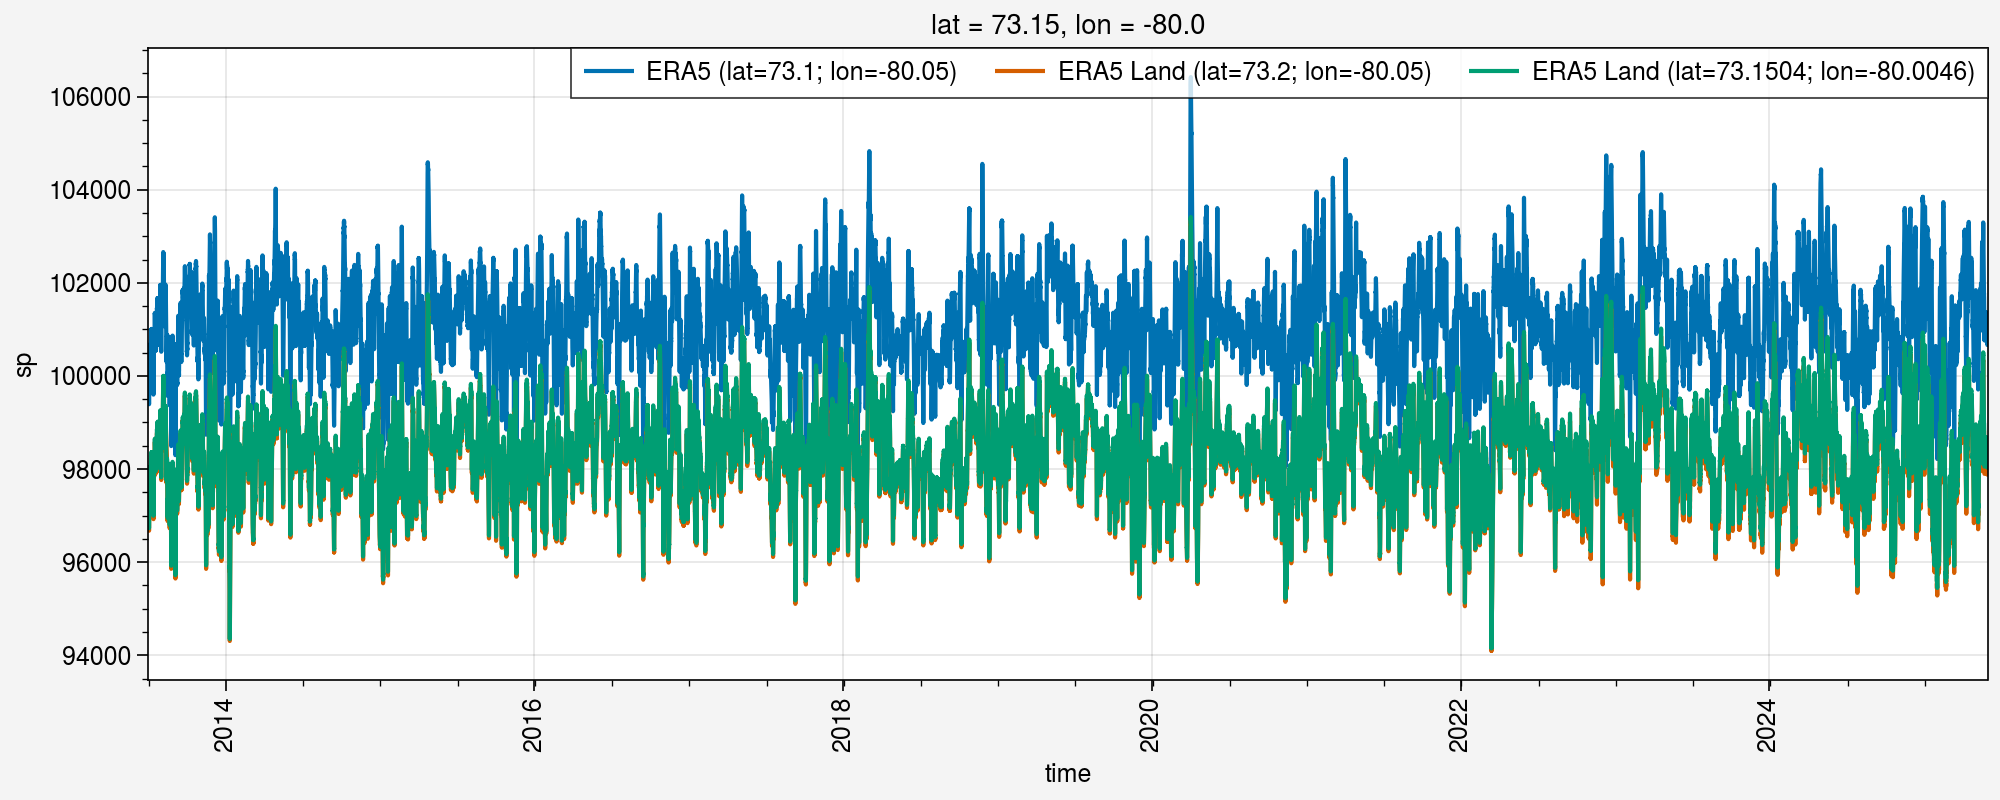

In [135]:
%matplotlib inline
fig, axs = pplt.subplots(figsize=(10,4))

var='sp'
time=slice(None, None)
# time=slice('2019-08-01', '2019-08-10')

ds_ERA5_grid.msl.sel(time=time).plot(ax=axs[0], label='ERA5 (lat='+str(ds_ERA5_grid.lat.values.item(0))+'; lon='+str(ds_ERA5_grid.lon.values.item(0))+')')
ds_ERA5_land_grid[var].sel(time=time).plot(ax=axs[0], label='ERA5 Land (lat='+str(ds_ERA5_land_grid.lat.values.item(0))+'; lon='+str(ds_ERA5_land_grid.lon.values.item(0))+')')
ds_ERA5_land_interp[var].sel(time=time).plot(ax=axs[0], label='ERA5 Land (lat='+str(ds_ERA5_land_interp.lat.values.item(0))+'; lon='+str(ds_ERA5_land_interp.lon.values.item(0))+')')
axs.legend()